total_ylim [10000.0, 1000000.0]
pref_ylim [100.0, 100000.0]
total_ylim [0, 467.81428571428575]
pref_ylim [0, 36.92857142857143]
total_ylim [0, 766.7]
pref_ylim [0, 102.30000000000001]
total_ylim [0, 1.5]
pref_ylim [0, 1.5]
total_ylim [0.0001, 0.01]
pref_ylim [1e-05, 1.0]
total_ylim [1e-05, 0.001]
pref_ylim [1e-05, 1.0]


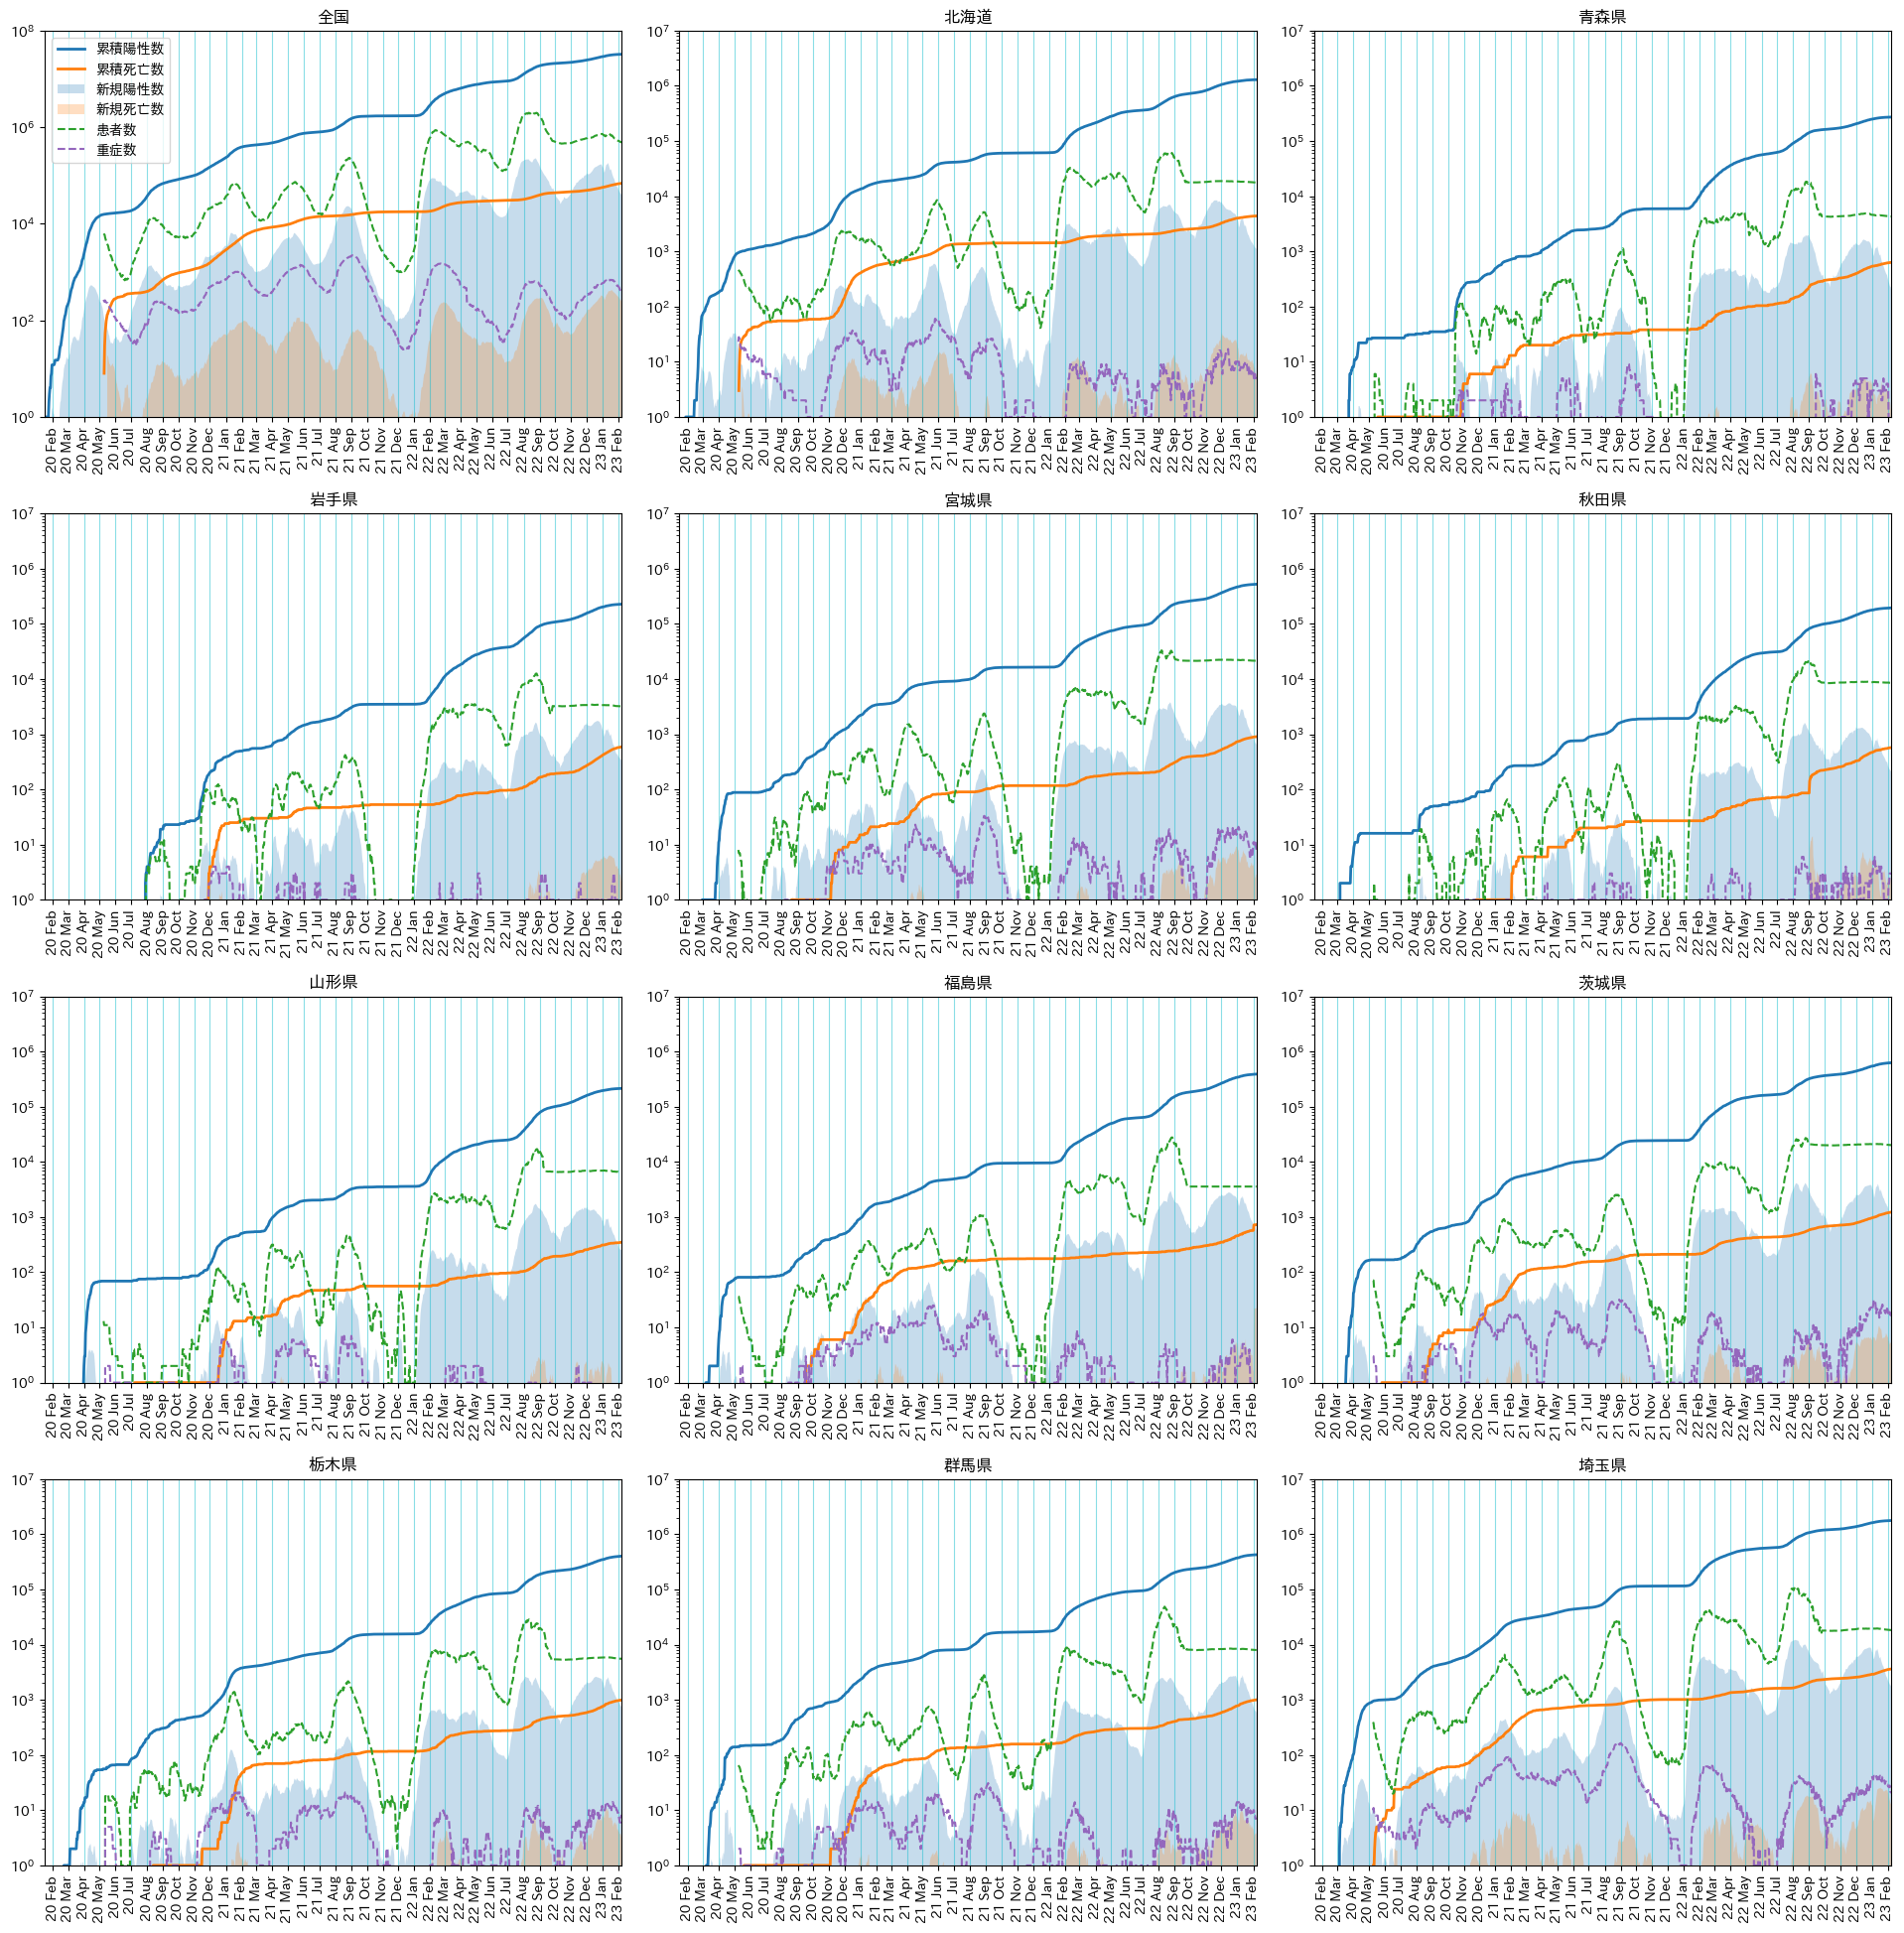

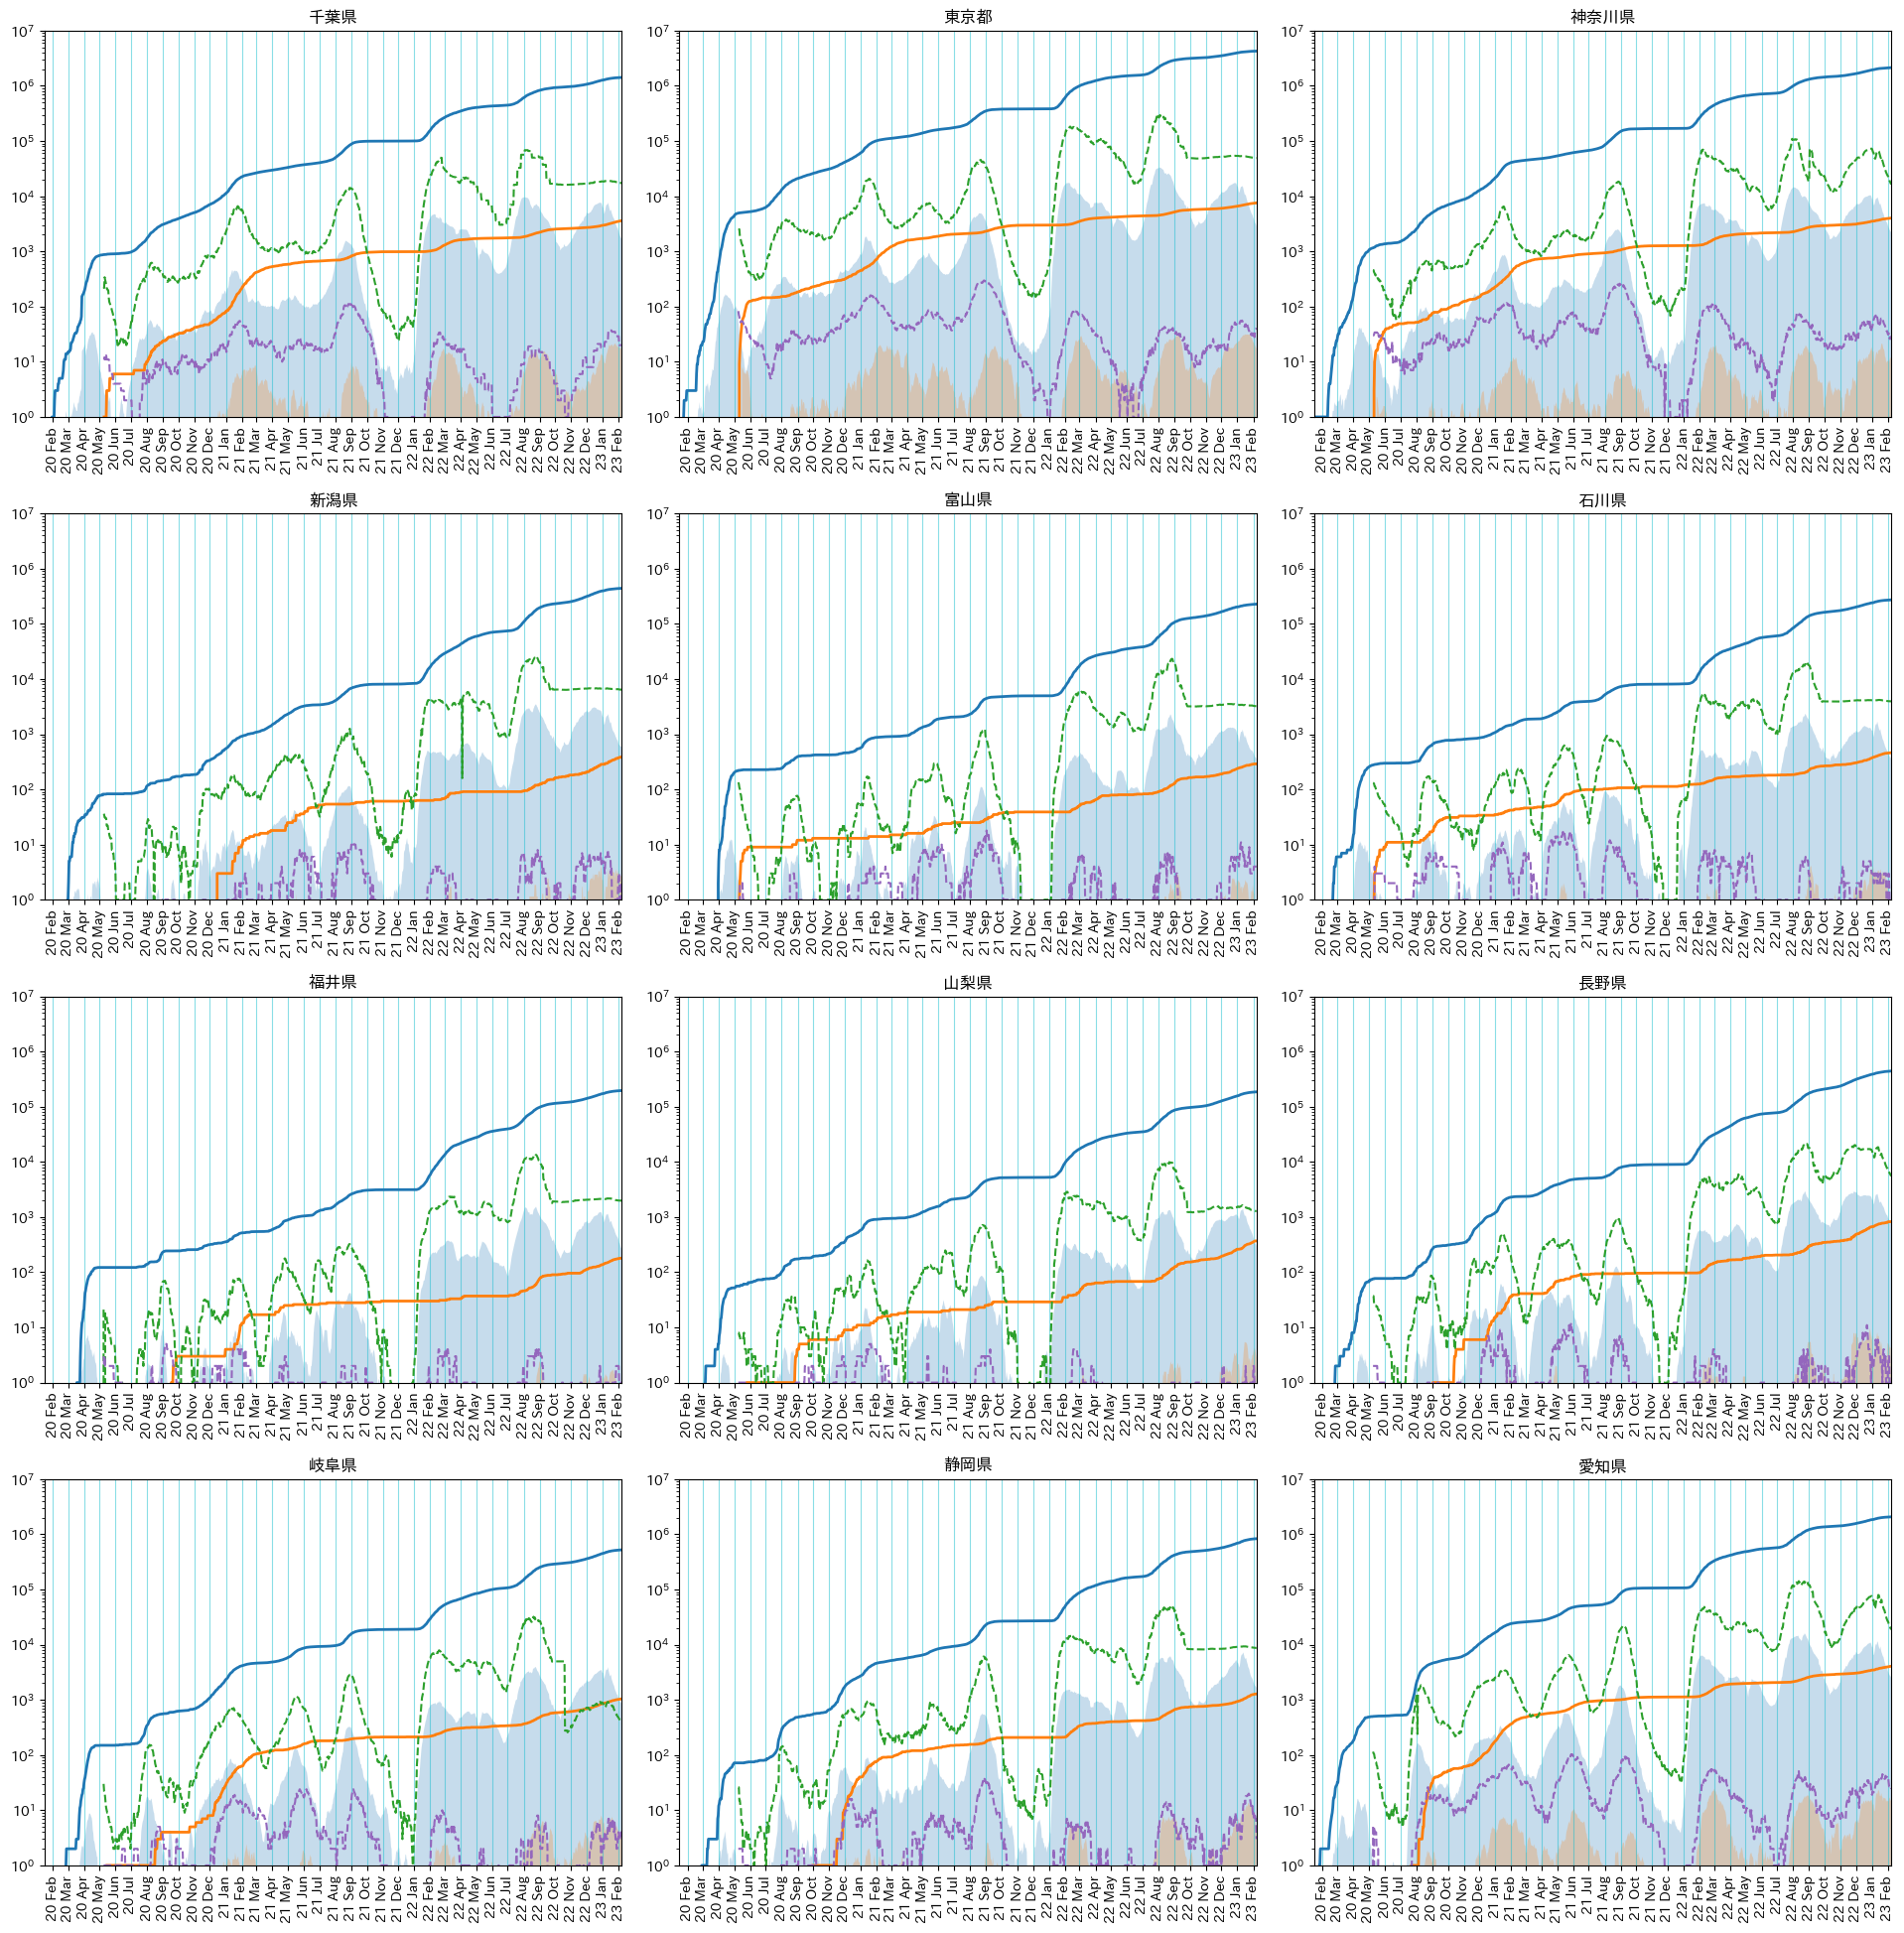

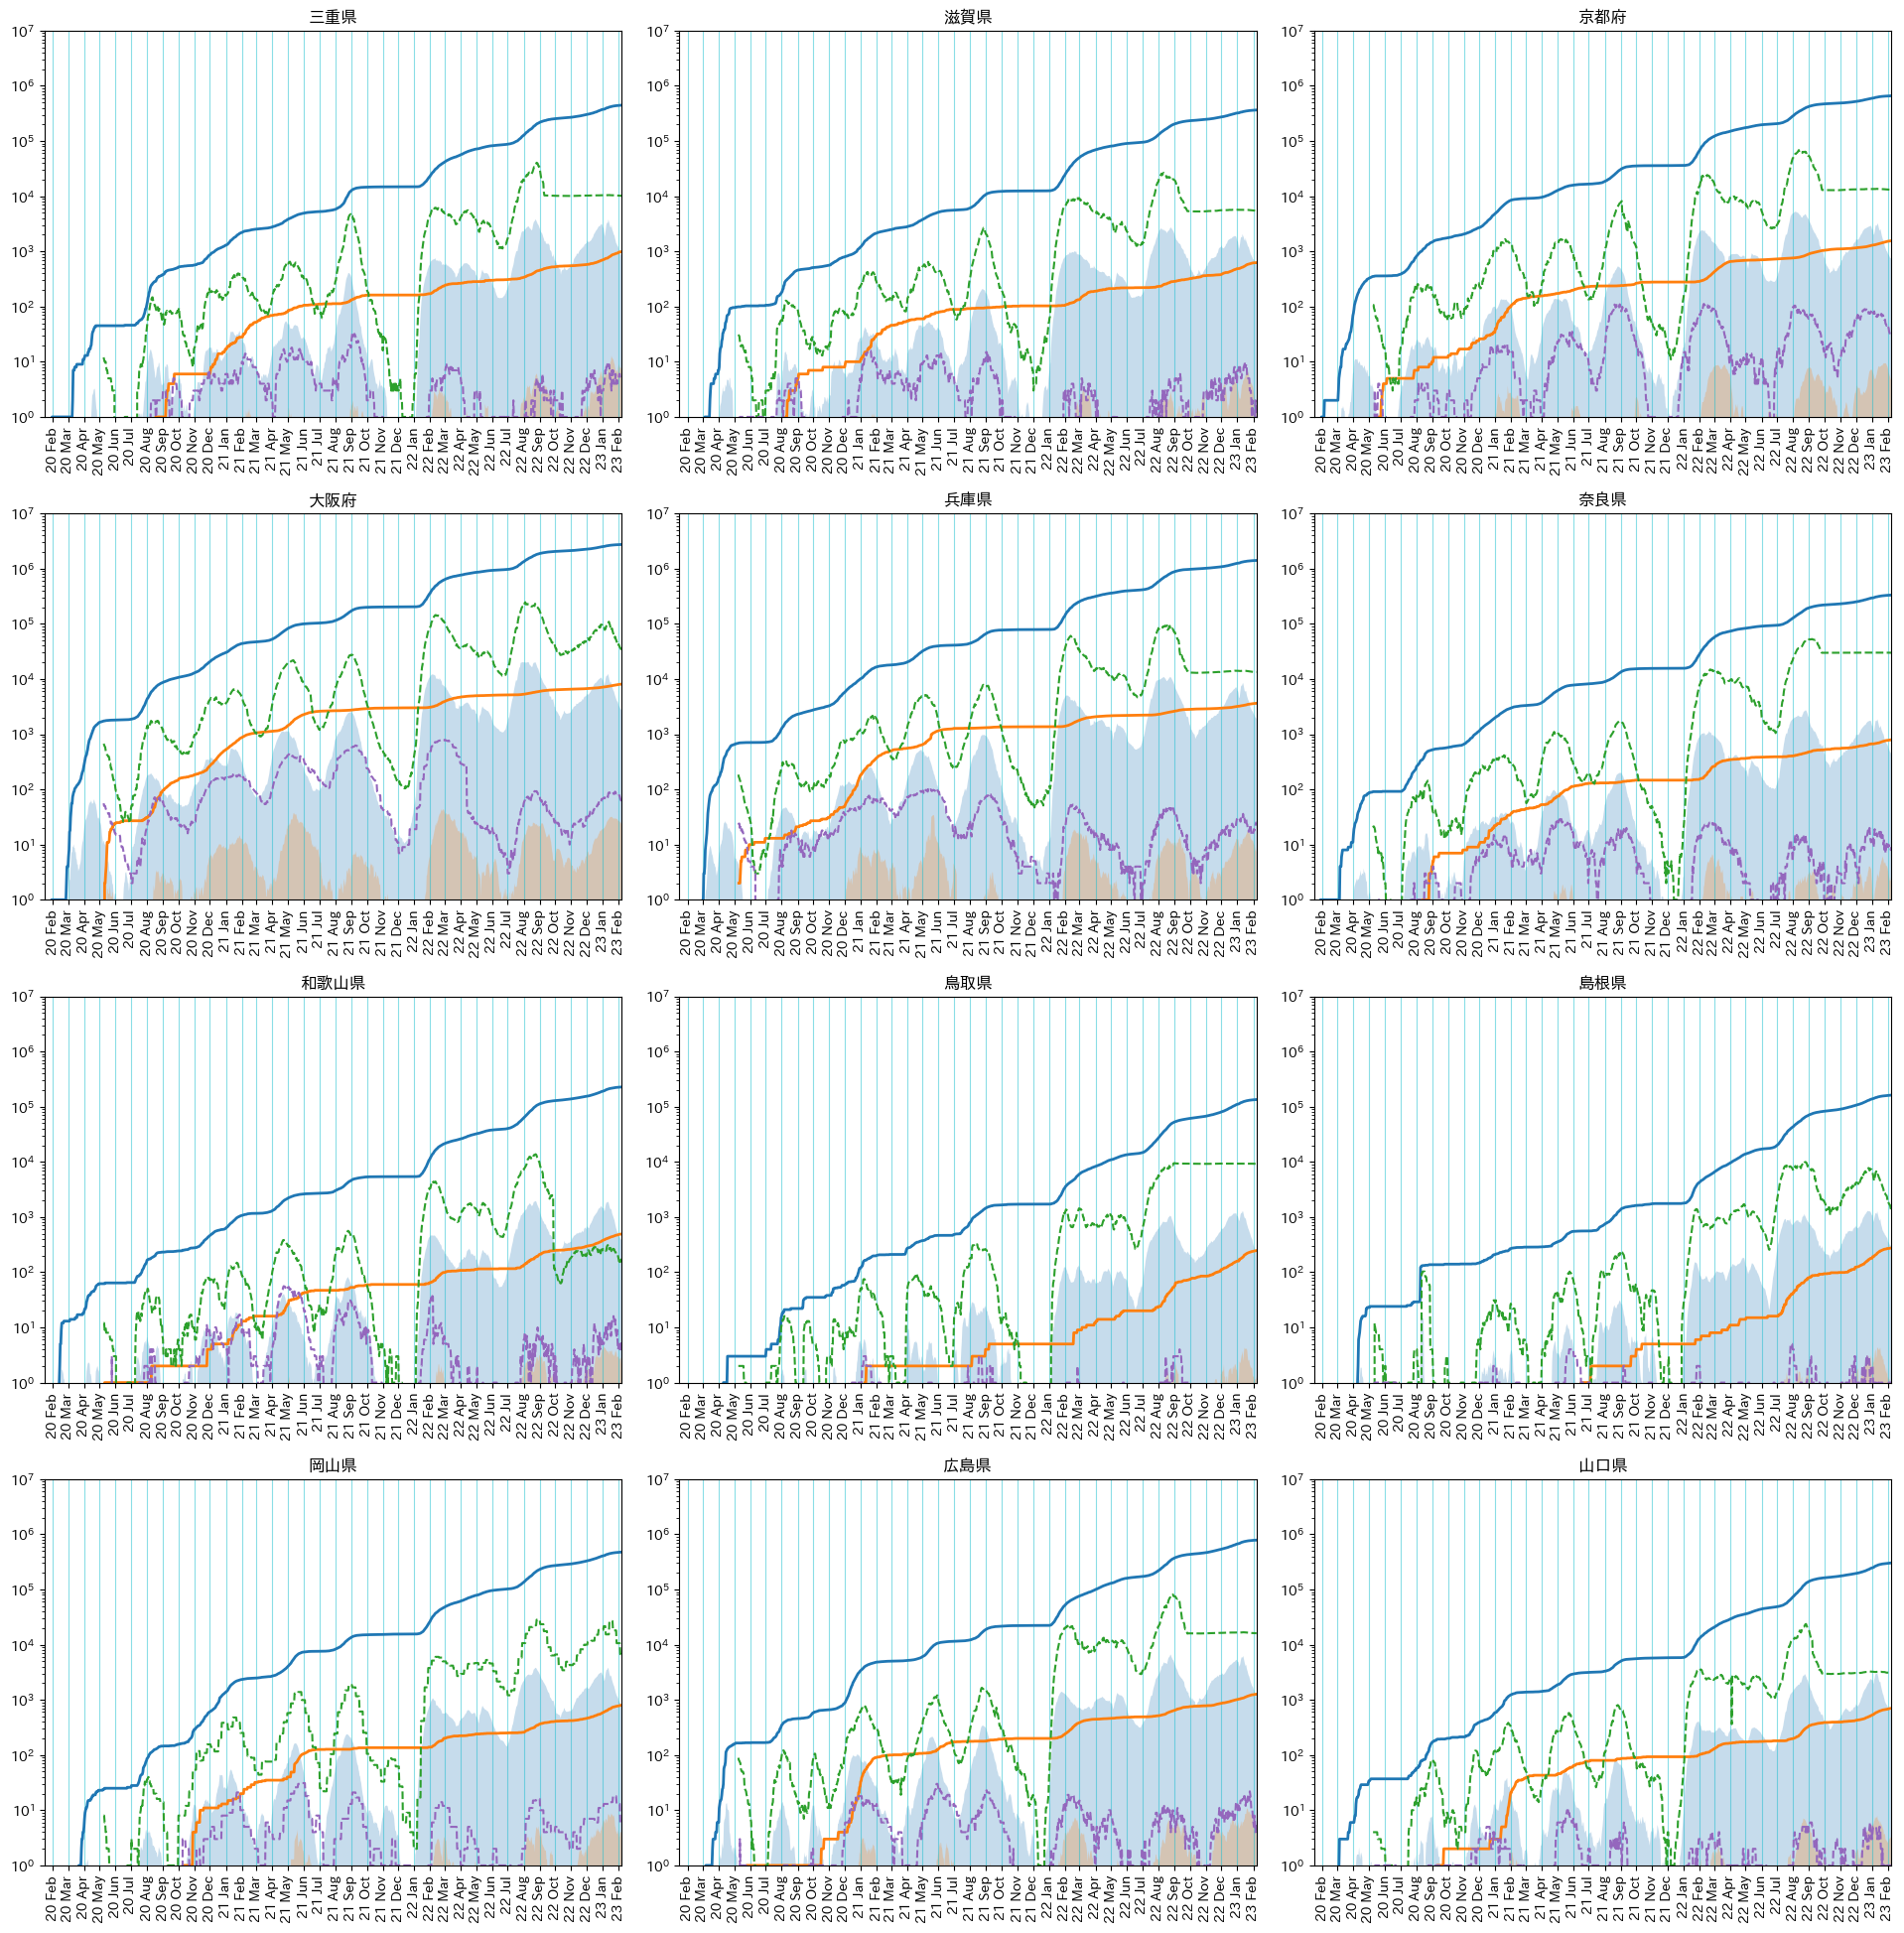

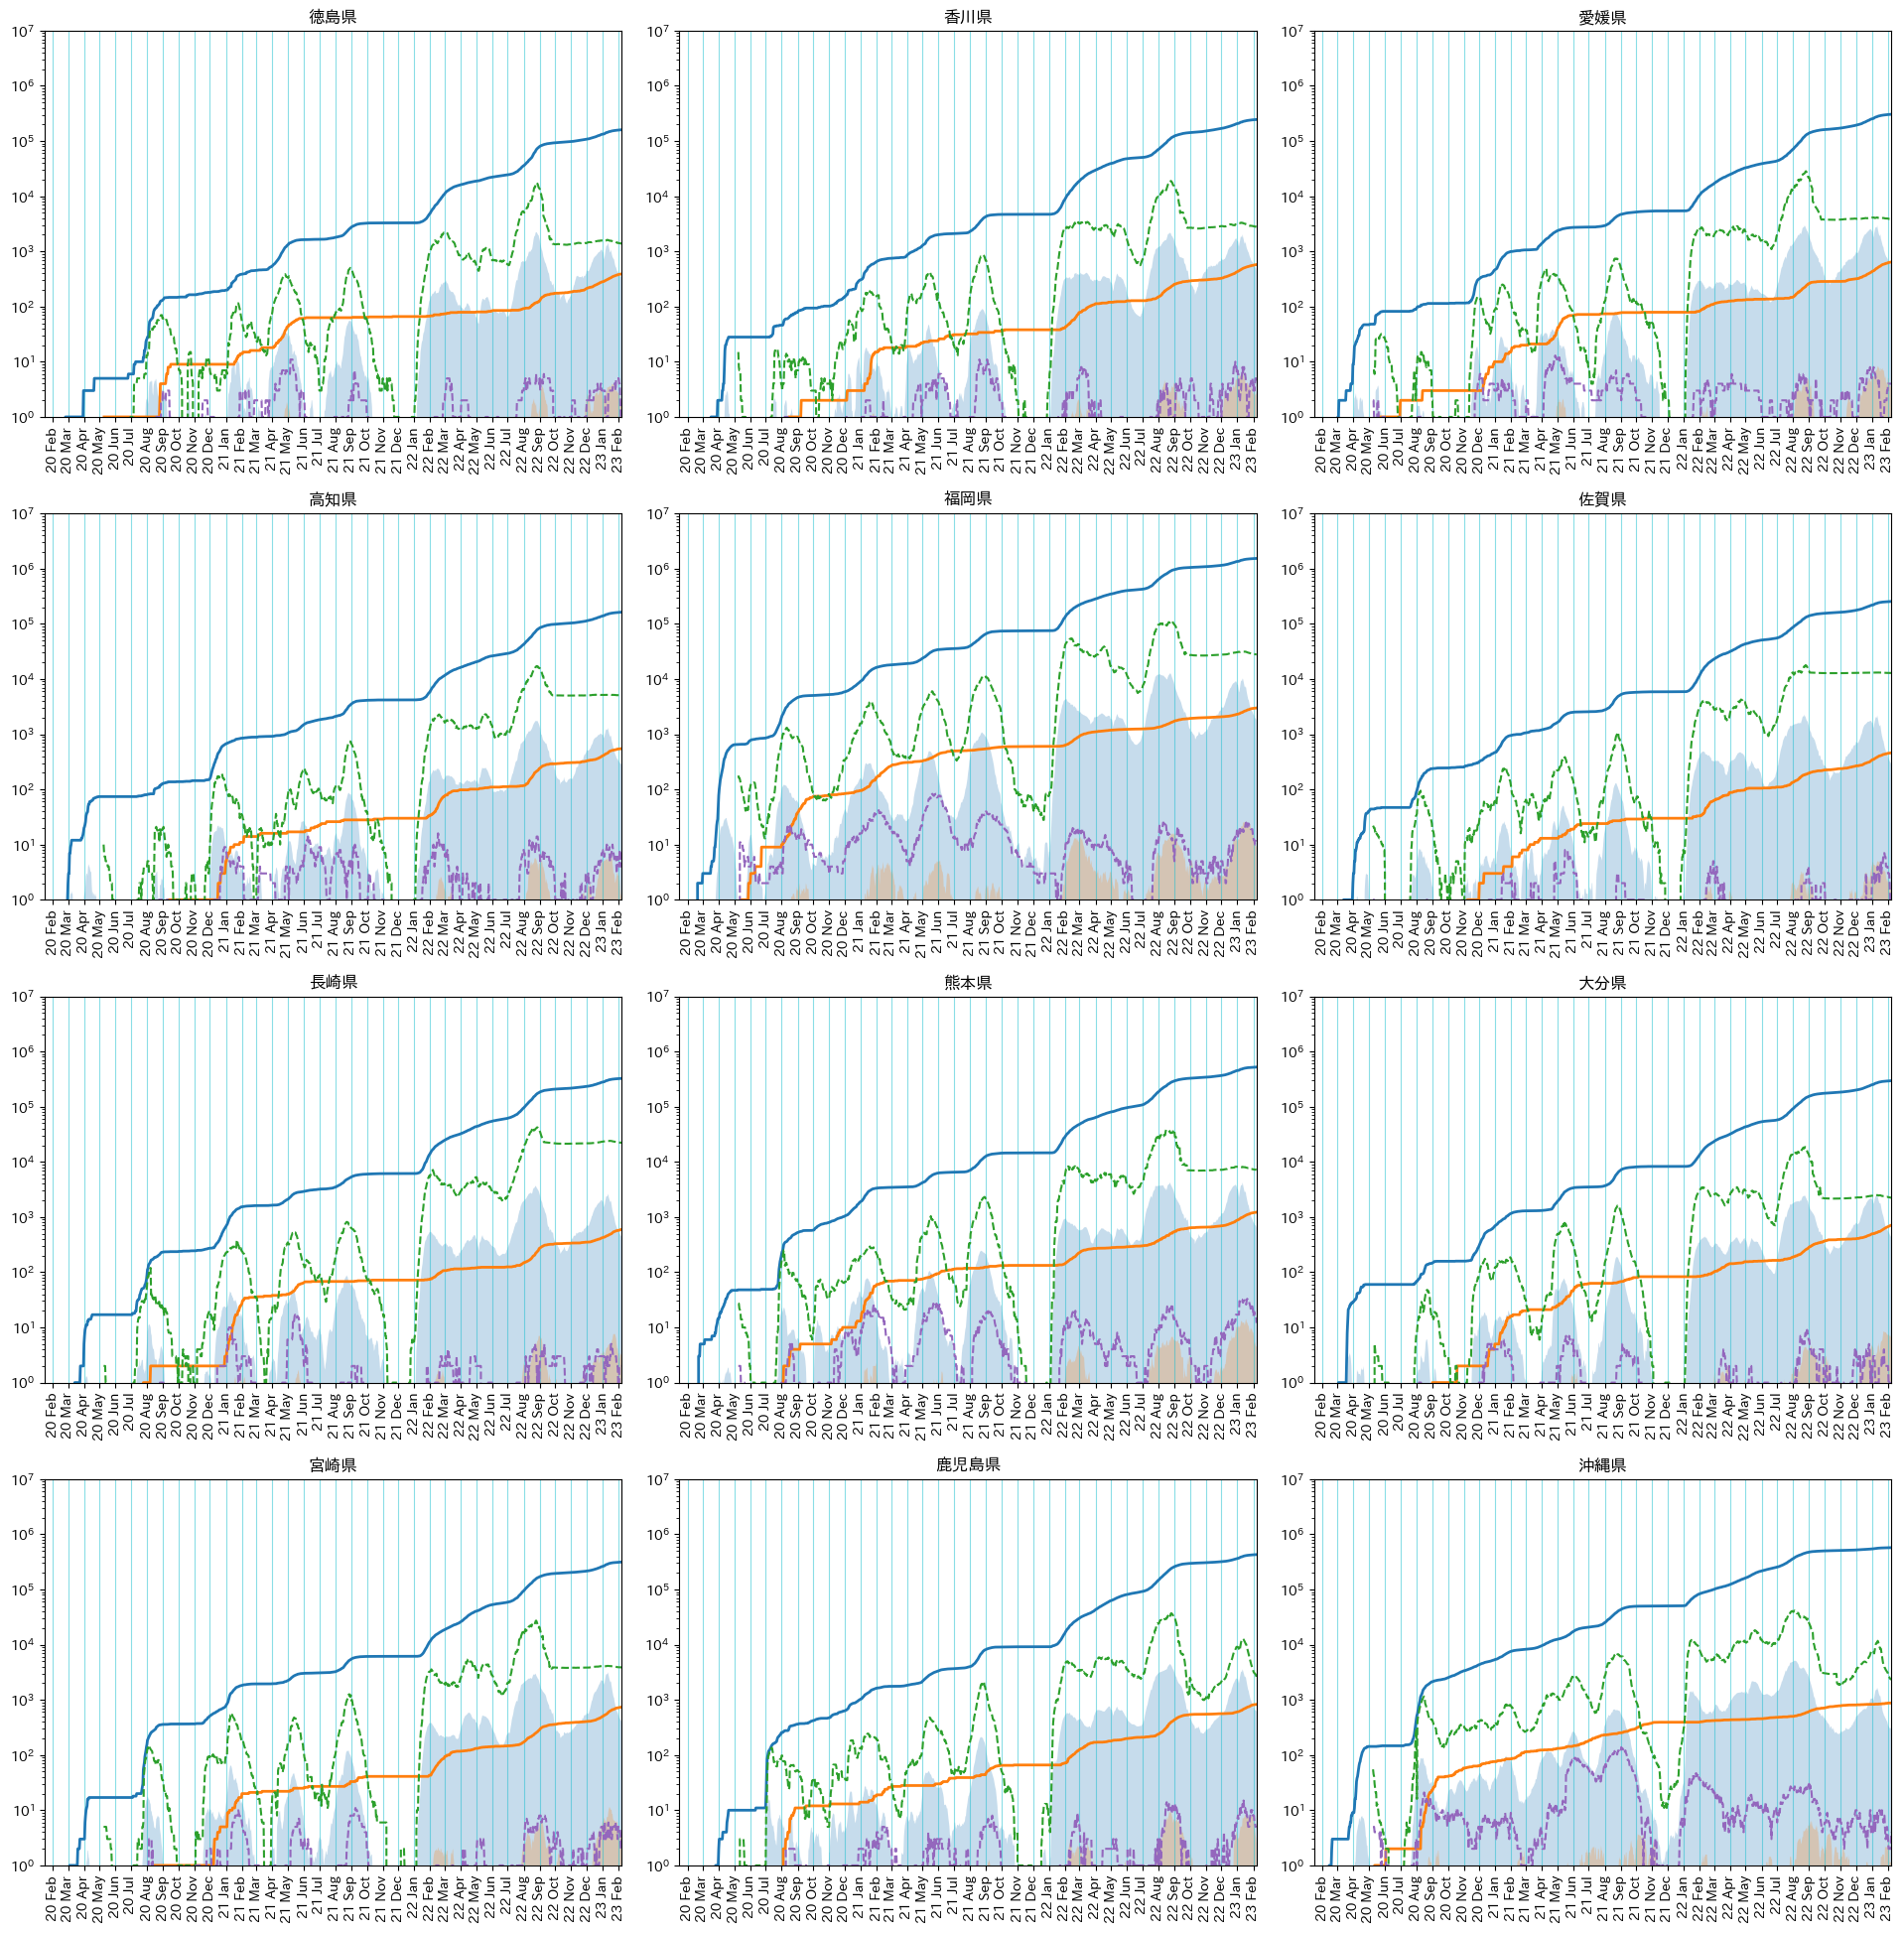

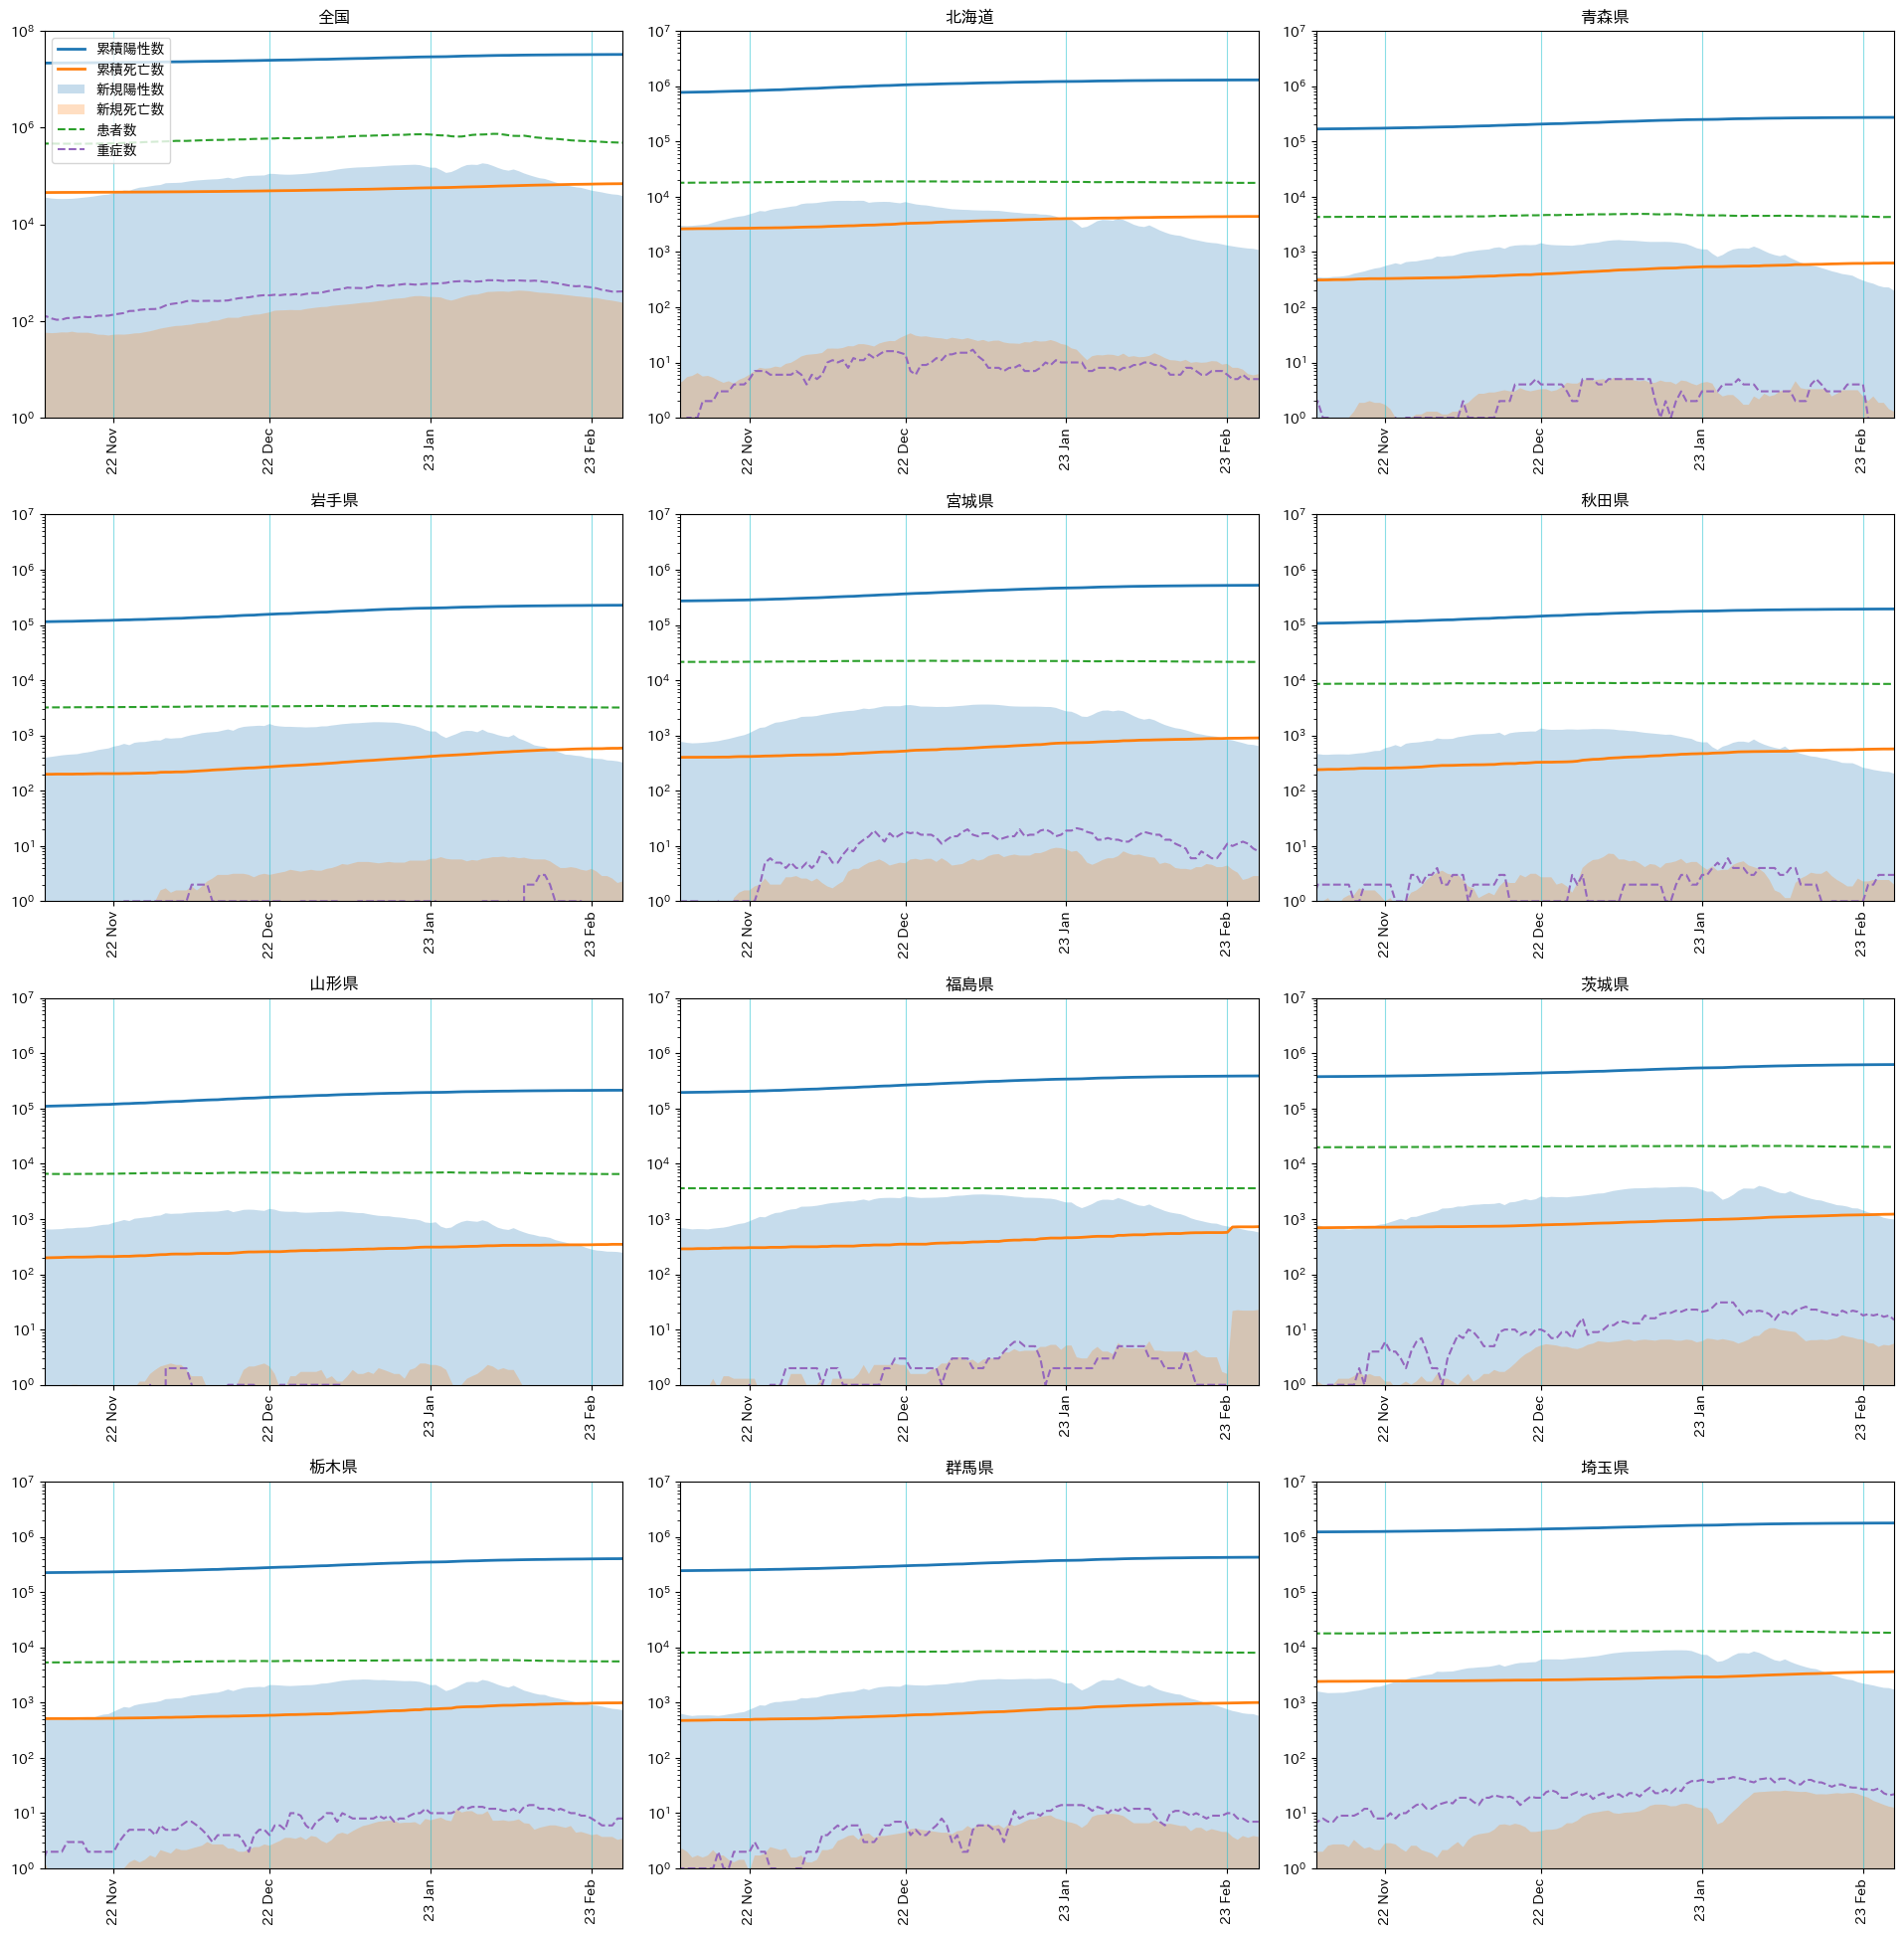

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt, dates as mdates
import japanize_matplotlib
import datetime as dt
# 県名の英語/日本語対応
EN_pref = ['ALL', 'Hokkaido', 'Aomori', 'Iwate', 'Miyagi', 'Akita', 'Yamagata', 'Fukushima', 'Ibaraki', 'Tochigi', 'Gunma', 'Saitama', 'Chiba', 'Tokyo', 'Kanagawa', 'Niigata', 'Toyama', 'Ishikawa', 'Fukui', 'Yamanashi', 'Nagano', 'Gifu', 'Shizuoka', 'Aichi', 'Mie', 
           'Shiga', 'Kyoto', 'Osaka', 'Hyogo', 'Nara','Wakayama','Tottori', 'Shimane', 'Okayama', 'Hiroshima', 'Yamaguchi', 'Tokushima', 'Kagawa', 'Ehime', 'Kochi', 'Fukuoka', 'Saga', 'Nagasaki', 'Kumamoto', 'Oita', 'Miyazaki','Kagoshima','Okinawa']
JP_pref = ["全国", '北海道', '青森県', '岩手県', '宮城県', '秋田県', '山形県', '福島県', '茨城県', '栃木県', '群馬県', '埼玉県', '千葉県', '東京都', '神奈川県', '新潟県', '富山県', '石川県', '福井県', '山梨県', '長野県',  '岐阜県', '静岡県', '愛知県', '三重県',
           '滋賀県', '京都府', '大阪府', '兵庫県', '奈良県', '和歌山県', '鳥取県', '島根県', '岡山県', '広島県', '山口県', '徳島県', '香川県', '愛媛県', '高知県', '福岡県', '佐賀県', '長崎県', '熊本県', '大分県', '宮崎県', '鹿児島県', '沖縄県'] 
JP_pref_of = dict(zip(EN_pref, JP_pref))
# 厚労省ホームページからデータを読込む
# 新規陽性者数を cases に取り込み，日付をインデックスにする
cases_url = "https://covid19.mhlw.go.jp/public/opendata/newly_confirmed_cases_daily.csv" # データの在処
cases = pd.read_csv(cases_url) # データフレームに取り込む
cases["Date"] = pd.to_datetime(cases["Date"]) # "Date"の列を文字列から日付オブジェクトに変換
cases = cases.set_index("Date") # "Date"列をインデックスに設定
# 累積死亡者数データを読込む
deaths_url = "https://covid19.mhlw.go.jp/public/opendata/deaths_cumulative_daily.csv" # データの在処
deaths = pd.read_csv(deaths_url) # データフレームに取り込む
deaths["Date"] = pd.to_datetime(deaths["Date"]) # "Date"の列を文字列から日付オブジェクトに変換
deaths = deaths.set_index("Date") # "Date"列をインデックスに設定
deaths = deaths.diff() # 差分を取って新規死亡者数に変換
# 入院等の治療を要する者(=患者数）を読込む
patients_url = "https://covid19.mhlw.go.jp/public/opendata/requiring_inpatient_care_etc_daily.csv" # データの在処
patients_orig = pd.read_csv(patients_url) # まずは全てのデータをデータフレーム hosp_orig に取り込む
patients_orig["Date"] = pd.to_datetime(patients_orig["Date"]) # "Date"の列を文字列から日付オブジェクトに変換
patients_orig = patients_orig.set_index("Date") # "Date"列をインデックスに設定

# 「入院治療等を要する者」だけのデータフレーム hosp を作成する
patients = patients_orig[["({}) Requiring inpatient care".format(pref) for pref in cases.columns]]
patients.columns = EN_pref # 列の名前を全国("ALL")と47都道府県名にする

# 重症者数
severe_url = "https://covid19.mhlw.go.jp/public/opendata/severe_cases_daily.csv" # データの在処
severe = pd.read_csv(severe_url) # データフレームに取り込む
severe["Date"] = pd.to_datetime(severe["Date"]) # "Date"の列を文字列から日付オブジェクトに変換
severe = severe.set_index("Date") # "Date"列をインデックスに設定
## read_csv を使って CSV 形式のデータを読込む
#hospitalized = pd.read_csv('https://www.stopcovid19.jp/data/covid19japan_beds/all.csv')
## 更新日を日付データに置き換える
#hospitalized["更新日"] = pd.to_datetime(hospitalized["更新日"])
## なぜか未来の日付のデータが混入しているので取除く
#hospitalized = hospitalized[hospitalized["更新日"]<=dt.datetime.today()]
## fillna(0)でデータ欠損部分をゼロ埋めし，整数型に変換する
#hospitalized["入院者数"] = hospitalized["入院者数"].fillna(0).astype(int)
## read_csv を使って CSV 形式のデータを読込む
#hospitalized = pd.read_csv('https://www.stopcovid19.jp/data/covid19japan_beds/all.csv')
## 更新日を日付データに置き換える
#hospitalized["更新日"] = pd.to_datetime(hospitalized["更新日"])
## なぜか未来の日付のデータが混入しているので取除く
#hospitalized = hospitalized[hospitalized["更新日"]<=dt.datetime.today()]
## fillna(0)でデータ欠損部分をゼロ埋めし，整数型に変換する
#hospitalized["入院者数"] = hospitalized["入院者数"].fillna(0).astype(int)
#hospitalized = hospitalized.set_index(["都道府県番号","更新日"])["入院者数"].sort_index().unstack().T
#hospitalized = pd.concat([hospitalized.sum(axis=1), hospitalized], axis=1)
#hospitalized.columns = EN_pref
# マルチインデックスのデータフレームにまとめる
#jp_df = pd.concat([cases.stack(), deaths.stack(), patients.stack(), hospitalized.stack(), severe.stack()], axis=1).swaplevel(0,1).sort_index().loc[EN_pref]
jp_df = pd.concat([cases.stack(), deaths.stack(), patients.stack(), severe.stack()], axis=1).swaplevel(0,1).sort_index().loc[EN_pref]
#jp_df.columns=["cases", "deaths", "patients", "hospitalized", "severe_cases"]
jp_df.columns=["cases", "deaths", "patients", "severe_cases"]


# 全国および各県の累積陽性数のオーダーを取得する
total_case = jp_df.cases.groupby(level=0).sum()
all_case_order = np.log10(total_case["ALL"]).astype(int)+1
pref_case_order = np.log10(total_case["Hokkaido":].max()).astype(int)+1
all_case_order, pref_case_order

# グラフ描画関数# グラフ描画関数
def plot_pref(pref_set, back_weeks=-1):
    cols = 3
    rows = np.ceil(len(pref_set)/cols).astype(int)
    fig, ax_tab = plt.subplots(rows, cols, figsize=(8*cols, 6*rows))
    ## カラム間の調整
    plt.subplots_adjust(wspace=0.1, hspace=0.25)
    axs = ax_tab.flatten()
    if back_weeks == -1:
        start_date = jp_df.index.get_level_values(1)[0]
    else:
        start_date = dt.datetime.today()-dt.timedelta(weeks=back_weeks)
    for pid, pref in enumerate(pref_set):
        ax = axs[pid]
        nc = jp_df.loc[pref].cases # 当該県の新規陽性数
        td = jp_df.loc[pref].deaths # 当該県の死亡数
        pt = jp_df.loc[pref].patients # 当該県の患者数
        # hc = jp_df.loc[pref].hospitalized.dropna() # 当該県の入院者数
        sc = jp_df.loc[pref].severe_cases # 当該県の重症数
        # 累積陽性・死亡数
        ax.plot( nc.cumsum(), label="累積陽性数", color="C0", lw=2, zorder=2 )
        ax.plot( td.cumsum(), label="累積死亡数", color="C1", lw=2, zorder=2 )
        # 新規陽性・死亡数
        ax.fill_between( nc.index, nc.rolling(7).mean(), lw=0, color="C0", label="新規陽性数",alpha=0.25 )
        ax.fill_between( td.index, td.rolling(7).mean(), lw=0, color="C1", label="新規死亡数",alpha=0.25 )
        # 入院・重症
        ax.plot( pt, color="C2", label="患者数", ls='--' )
        #ax.plot( hc, color="C3", label="入院者数", ls='--')
        ax.plot( sc, color="C4", label="重症数", ls='--' )
        # グラフの縦軸を整える
        ax.set_yscale('log')
        if pref == "ALL":
            ax.set_ylim([1,10**all_case_order])
            ax.legend(loc='upper left')
        else:
            ax.set_ylim([1, 10**pref_case_order])
        ax.set_title(JP_pref_of[pref])
        ## x軸の主目盛りを修正
        ax.xaxis.set_major_locator(mdates.MonthLocator()) # 主目盛りを月ごとに設定
        ax.xaxis.set_major_formatter(mdates.DateFormatter("%y %b")) # 主目盛りの表示を英語の月名短縮形にする
        ax.grid(which='major', axis='x', linestyle='-', color='tab:cyan', alpha=0.5) # 主目盛りのグリッドを水色にして，半透明にする
        ax.set_xlim((start_date, nc.index[-1]))
        plt.setp(ax.get_xticklabels(which='major'), rotation=90)
    return fig, axs

# 全国+47都道府県を4つに分けて描画し，グラフに保存
for sid in range(4):
    pref_set = EN_pref[sid*12:(sid+1)*12]
    fig, ax = plot_pref(pref_set)
    fig.savefig('fig/CoVid19-Japan-cases_by_pref-{}.png'.format(sid), bbox_inches='tight')

# 直近16週間だけをプロット
for sid in range(4):
    pref_set = EN_pref[sid*12:(sid+1)*12]
    fig, ax = plot_pref(pref_set, back_weeks=16)
    fig.savefig('fig/CoVid19-Japan-cases_by_pref-{}-recent.png'.format(sid), bbox_inches='tight')

# 地域別にプロットする
prefs_in = {'全国': ['ALL'],
            '北海道・東北':['Hokkaido', 'Aomori', 'Akita', 'Iwate', 'Miyagi', 'Yamagata', 'Fukushima'],
           '関東':['Tokyo', 'Ibaraki', 'Tochigi', 'Gunma', 'Saitama', 'Chiba', 'Kanagawa'],
           '北陸・中部':['Niigata', 'Toyama', 'Ishikawa', 'Fukui','Yamanashi', 'Nagano', 'Gifu', 'Shizuoka', 'Aichi'],
           '近畿':['Kyoto', 'Osaka', 'Mie', 'Shiga', 'Hyogo', 'Nara', 'Wakayama'],
           '中国':['Tottori', 'Shimane', 'Okayama', 'Hiroshima', 'Yamaguchi'],
           '四国':['Tokushima', 'Kagawa', 'Ehime', 'Kochi'],
           '九州・沖縄':['Fukuoka', 'Saga', 'Nagasaki', 'Oita', 'Kumamoto', 'Miyazaki', 'Kagoshima', 'Okinawa']}
def plot_by_area(in_df, back_weeks=-1, yscale="log", is_step=False, total_ylim=None, pref_ylim=None): # 
    rows = 4
    cols = 2
    fig, ax_tab = plt.subplots(rows, cols, figsize=(8*cols,6*rows))
    ## カラム間の調整
    plt.subplots_adjust(wspace=0.1, hspace=0.25)
    axs = ax_tab.flatten()
    # x の表示範囲
    dates = in_df.index.get_level_values(1)
    if back_weeks == -1:
        start_date = dates[0]
    else:
        start_date = dt.datetime.today()-dt.timedelta(weeks=back_weeks)
    xlim = (start_date, dates[-1])

    # y の表示範囲
    in_df = in_df[dates>=start_date]
    max_df = in_df.groupby(level=0).max()
    min_df = in_df.groupby(level=0).min()
    if yscale=='log':
        if total_ylim is None:
            max_order = np.ceil(np.log10(in_df.groupby(level=0).max()))
            min_order = np.floor(np.log10(in_df.groupby(level=0).min()))
            total_max_order = max_order["ALL"]
            total_min_order = min_order["ALL"]
            total_ylim = [10**total_min_order, 10**total_max_order]
        if pref_ylim is None:
            pref_max_order = max_order.iloc[1:].max()
            pref_min_order = min_order.iloc[1:].min()
            pref_ylim = [10**pref_min_order, 10**pref_max_order]
        print("total_ylim", total_ylim)
        print("pref_ylim", pref_ylim)
    else:
        if total_ylim is None:
            total_ylim = [0, max_df["ALL"]*1.1]
        if pref_ylim is None:
            pref_ylim = [0, max_df.iloc[1:].max()*1.1]
        print("total_ylim", total_ylim)
        print("pref_ylim", pref_ylim)

    for rid, region in enumerate(prefs_in):
        ax = axs[rid]
        for pref in prefs_in[region]:
            if pref not in in_df.index.get_level_values(level=0):
                continue
            if is_step:
                ax.step(in_df.loc[pref].index, in_df.loc[pref], label=JP_pref_of[pref])
            else:
                ax.plot(in_df.loc[pref], label=JP_pref_of[pref])
            ax.set_yscale(yscale)
            if region=="全国":
                ylim = total_ylim
            else:
                ylim = pref_ylim
        # 見栄えを整える
        ax.set_xlim(xlim)
        ax.set_ylim(ylim)
        ax.set_title(region)
        ax.legend(loc="lower left")
        ax.xaxis.set_major_locator(mdates.MonthLocator()) # 主目盛りを月ごとに設定
        ax.xaxis.set_major_formatter(mdates.DateFormatter("%y %b")) # 主目盛りの表示を英語の月名短縮形にする
        ax.grid(which='major', axis='x', linestyle='-', color='tab:cyan', alpha=0.5) # 主目盛りのグリッドを水色にして，半透明にする
        ax.grid(which='major', axis='y', linestyle='-', color='tab:grey', alpha=0.5) # y軸主目盛りのグリッドを灰色にして，半透明にする
        plt.setp(ax.get_xticklabels(which='major'), rotation=90) # 90度回転

    return in_df, fig, axs
#
bw = 24 # どれだけ遡るか
tw = 7 # 移動平均
# 新規陽性者数
nc = jp_df.cases.rolling(tw).mean().dropna()
tdf, fig, axs = plot_by_area(nc, back_weeks=bw)
fig.savefig("fig/CoVid19-Japan-recent-cases_by_area.png", bbox_inches='tight')

# 新規死亡者数
nd = jp_df.deaths.rolling(tw).mean().dropna()
tdf, fig, ax = plot_by_area(nd, back_weeks=bw, yscale="linear")
fig.savefig("fig/CoVid19-Japan-recent-deaths_by_area.png", bbox_inches='tight')

## 入院者数
#hs = jp_df.hospitalized.dropna()
#tdf, fig, ax = plot_by_area(hs, back_weeks=bw, yscale="linear", is_step=True)
#fig.savefig("fig/CoVid19-Japan-recent-hospitalized_by_area.png", bbox_inches='tight')

# 重症者数
sc = jp_df.severe_cases
tdf, fig, ax = plot_by_area(sc, back_weeks=bw, yscale="linear", is_step=True)
fig.savefig("fig/CoVid19-Japan-recent-severe_cases_by_area.png", bbox_inches='tight')

# 実効再生産数((「直近7日間の感染者数」/「その前7日間の感染者数」)^(「平均世代期間」/「報告期間」))
tw = 7 # 発生期間・報告期間
# gd = 5 # 世代時間
gd = 2 # 平均世代時間(オミクロン株が主流となった状況を反映させるため．下記の東洋経済オンラインを参照）
# https://toyokeizai.net/sp/visual/tko/covid19/
cc = jp_df.cases.cumsum().diff(tw)
Rt = (cc/cc.shift(tw))**(gd/tw)
tdf, fig, axs = plot_by_area(Rt, back_weeks=bw, yscale="linear", total_ylim=[0,1.5], pref_ylim=[0,1.5])
for ax in axs:
    ax.hlines(1.0, *ax.get_xlim(), linestyle='--', alpha=0.8)
fig.savefig("fig/CoVid19-Japan-recent-Rt_by_area.png", bbox_inches='tight')

## 患者数あたりの入院者
#hs_by_pt = jp_df.hospitalized/jp_df.patients
#hs_by_pt = hs_by_pt[(jp_df.hospitalized>0) & (jp_df.patients>0)].dropna()
#tdf, fig, ax = plot_by_area(hs_by_pt, back_weeks=52, yscale="log")
#fig.savefig("fig/CoVid19-Japan-hospitalized_per_patients_by_area.png", bbox_inches='tight')

# 患者数あたりの重症者
sc_by_pt = jp_df.severe_cases/jp_df.patients
sc_by_pt = sc_by_pt[(jp_df.severe_cases>0) & (jp_df.patients>0)].rolling(7).mean()
tdf, fig, ax = plot_by_area(sc_by_pt, back_weeks=52, yscale="log")
fig.savefig("fig/CoVid19-Japan-severe_cases_per_patients_by_area.png", bbox_inches='tight')

# 患者数あたりの死亡者
nd_by_pt = jp_df.deaths/jp_df.patients
nd_by_pt = nd_by_pt[(jp_df.deaths>0) & (jp_df.patients>0)].rolling(7).mean()
tdf, fig, ax = plot_by_area(nd_by_pt, back_weeks=52, yscale="log")
fig.savefig("fig/CoVid19-Japan-deaths_per_patients_by_area.png", bbox_inches='tight')


#
# 地域ごとに集計化された患者あたりの入院者，重症者，死亡率をプロット
#
tw = 7
rows = 4
cols = 2
fig, ax_tab = plt.subplots(rows, cols, figsize=(8*cols,6*rows))
## カラム間の調整
plt.subplots_adjust(wspace=0.1, hspace=0.25)
axs = ax_tab.flatten()

jp_nc, jp_nd, jp_pt, jp_sc = jp_df.cases, jp_df.deaths, jp_df.patients, jp_df.severe_cases
#jp_hs = jp_df.hospitalized.dropna()
dates = jp_pt[jp_pt>0].index.get_level_values(level=1)
for rid, region in enumerate(prefs_in):
    ax = axs[rid]
    nc = jp_nc.loc[prefs_in[region]].groupby(level=1).sum()
    nd = jp_nd.loc[prefs_in[region]].groupby(level=1).sum()
    pt = jp_pt.loc[prefs_in[region]].groupby(level=1).sum()
    sc = jp_sc.loc[prefs_in[region]].groupby(level=1).sum()
    #hs = jp_hs.loc[prefs_in[region]].groupby(level=1).sum()
    #hs_pt = hs/pt[hs.index]
    sc_pt = (sc/pt)[(sc>0) & (pt>0)]
    nd_pt = (nd/pt)[(nd>0) & (pt>0)].rolling(tw).mean()
    #ax.plot(hs_pt, label="入院率")
    ax.plot(sc_pt, label="重症率")
    ax.plot(nd_pt, label="死亡率")
    if rid == 0:
        ax.legend()
        ax.set_ylabel("患者1名あたりの入院・重症・死亡者数")
    ax.set_title(region)
    ax.set_yscale('log')
    ax.set_xlim([dates[0], dates[-1]])
    ## x軸の主目盛りを修正
    ax.xaxis.set_major_locator(mdates.MonthLocator()) # 主目盛りを月ごとに設定
    ax.xaxis.set_major_formatter(mdates.DateFormatter("%y %b")) # 主目盛りの表示を英語の月名短縮形にする
    ax.grid(which='major', axis='x', linestyle='-', color='tab:cyan', alpha=0.5) # 主目盛りのグリッドを水色にして，半透明にする
    ax.grid(which='major', axis='y', linestyle='-', color='tab:grey', alpha=0.5) # y軸主目盛りのグリッドを灰色にして，半透明にする
    plt.setp(ax.get_xticklabels(which='major'), rotation=90) # 90度回転

ymax = max([ax.get_ylim()[1] for ax in axs])
ymin = min([ax.get_ylim()[0] for ax in axs])
for ax in axs:
    ax.set_ylim([ymin, ymax])
fig.savefig("fig/CoVid19-Japan-ratios_by_area.png", bbox_inches='tight')

#
# 全国の患者1名あたりの入院・重症・死亡者数
#
fig, ax = plt.subplots(1,1,figsize=(8,6))
all_df = jp_df.loc["ALL"]
nd = all_df.deaths
pt = all_df.patients
sc = all_df.severe_cases
#hs = all_df.hospitalized.dropna()
dates = pt[pt>0].index
#hs_pt = hs/pt[hs.index]
sc_pt = (sc/pt)[(sc>0) & (pt>0)]
nd_pt = (nd/pt)[(nd>0) & (pt>0)].rolling(tw).mean()
#ax.plot(hs_pt, label="入院者数/患者数")
ax.plot(sc_pt, label="重症者数/患者数")
ax.plot(nd_pt, label="新規死亡者数/患者数(7日間移動平均)")
ax.legend()
ax.set_title("患者1名あたりの入院・重症・死亡者数\n<情報源>\n- 入院者数：厚労省「療養状況等及び入院患者受入病床数等に関する調査\n- 患者数: 厚労省「オープンデータ」入院治療等を要する者\n- 新規死亡者数: 厚労省「オープンデータ」死亡者数(累積)の差分")
ax.set_yscale('log')
ax.set_xlim([dates[0], dates[-1]])
## x軸の主目盛りを修正
ax.xaxis.set_major_locator(mdates.MonthLocator()) # 主目盛りを月ごとに設定
ax.xaxis.set_major_formatter(mdates.DateFormatter("%y %b")) # 主目盛りの表示を英語の月名短縮形にする
ax.grid(which='major', axis='x', linestyle='-', color='tab:cyan', alpha=0.5) # x軸主目盛りのグリッドを水色にして，半透明にする
ax.grid(which='major', axis='y', linestyle='-', color='tab:grey', alpha=0.5) # y軸主目盛りのグリッドを灰色にして，半透明にする
plt.setp(ax.get_xticklabels(which='major'), rotation=90) # 90度回転
fig.savefig("fig/CoVid19-Japan-ratios.png", bbox_inches='tight')


In [21]:
hospitalized["入院者数"].str.isnumeric()==False]

6343     北海道
6344     青森県
6345     岩手県
6346     宮城県
6347     秋田県
6348     山形県
6349     福島県
6350     茨城県
6351     栃木県
6352     群馬県
6353     埼玉県
6354     千葉県
6355     東京都
6356    神奈川県
6357     新潟県
6358     富山県
6359     石川県
6360     福井県
6361     山梨県
6362     長野県
6363     岐阜県
6364     静岡県
6365     愛知県
6366     三重県
6367     滋賀県
6368     京都府
6369     大阪府
6370     兵庫県
6371     奈良県
6372    和歌山県
6373     鳥取県
6374     島根県
6375     岡山県
6376     広島県
6377     山口県
6378     徳島県
6379     香川県
6380     愛媛県
6381     高知県
6382     福岡県
6383     佐賀県
6384     長崎県
6385     熊本県
6386     大分県
6387     宮崎県
6388    鹿児島県
6389     沖縄県
Name: 入院者数, dtype: object

In [5]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt, dates as mdates
import japanize_matplotlib
import datetime as dt
# 県名の英語/日本語対応
EN_pref = ['ALL', 'Hokkaido', 'Aomori', 'Iwate', 'Miyagi', 'Akita', 'Yamagata', 'Fukushima', 'Ibaraki', 'Tochigi', 'Gunma', 'Saitama', 'Chiba', 'Tokyo', 'Kanagawa', 'Niigata', 'Toyama', 'Ishikawa', 'Fukui', 'Yamanashi', 'Nagano', 'Gifu', 'Shizuoka', 'Aichi', 'Mie', 
           'Shiga', 'Kyoto', 'Osaka', 'Hyogo', 'Nara','Wakayama','Tottori', 'Shimane', 'Okayama', 'Hiroshima', 'Yamaguchi', 'Tokushima', 'Kagawa', 'Ehime', 'Kochi', 'Fukuoka', 'Saga', 'Nagasaki', 'Kumamoto', 'Oita', 'Miyazaki','Kagoshima','Okinawa']
JP_pref = ["全国", '北海道', '青森県', '岩手県', '宮城県', '秋田県', '山形県', '福島県', '茨城県', '栃木県', '群馬県', '埼玉県', '千葉県', '東京都', '神奈川県', '新潟県', '富山県', '石川県', '福井県', '山梨県', '長野県',  '岐阜県', '静岡県', '愛知県', '三重県',
           '滋賀県', '京都府', '大阪府', '兵庫県', '奈良県', '和歌山県', '鳥取県', '島根県', '岡山県', '広島県', '山口県', '徳島県', '香川県', '愛媛県', '高知県', '福岡県', '佐賀県', '長崎県', '熊本県', '大分県', '宮崎県', '鹿児島県', '沖縄県'] 
JP_pref_of = dict(zip(EN_pref, JP_pref))
# 厚労省CSVを読込む
# 新規感染者
new_case = pd.read_csv('https://covid19.mhlw.go.jp/public/opendata/newly_confirmed_cases_daily.csv')
new_case["Date"] = pd.to_datetime(new_case["Date"])
new_case = new_case.set_index("Date")
# 累積死亡者
total_death = pd.read_csv("https://covid19.mhlw.go.jp/public/opendata/deaths_cumulative_daily.csv")
total_death["Date"] = pd.to_datetime(total_death["Date"])
total_death = total_death.set_index("Date")
# 入院治療
hospitalized_case = pd.read_csv("https://covid19.mhlw.go.jp/public/opendata/requiring_inpatient_care_etc_daily.csv")
hospitalized_case["Date"] = pd.to_datetime(hospitalized_case["Date"])
hospitalized_case = hospitalized_case.set_index("Date")
# 重症者
severe_case = pd.read_csv("https://covid19.mhlw.go.jp/public/opendata/severe_cases_daily.csv")
severe_case["Date"] = pd.to_datetime(severe_case["Date"])
severe_case = severe_case.set_index("Date")
# 全国および各県の累積陽性数のオーダーを取得する
total_case = new_case["ALL"]
total_case_order = np.log10(total_case.sum()).astype(int)+1
pref_case_order = np.log10(new_case.loc[:,"Hokkaido":].sum(axis=0).max()).astype(int)+1


In [ ]:
cc = jp_df.cases.cumsum().diff(tw)
Rt = (cc/cc.shift(tw))**(gd/tw)


In [2]:
# グラフ描画関数
def plot_pref(pref_set, back_weeks=-1):
    cols = 3
    rows = np.ceil(len(pref_set)/cols).astype(int)
    fig, ax = plt.subplots(rows, cols, figsize=(8*cols, 6*rows))
    if back_weeks == -1:
        start_date = new_case.index[0]
    else:
        start_date = dt.datetime.today()-dt.timedelta(weeks=back_weeks)
    for pid, pref in enumerate(pref_set):
        a = ax.flatten()[pid]
        nc = new_case[pref] # 当該県の新規陽性数
        td = total_death[pref] # 当該県の死亡数
        hc = hospitalized_case["({:s}) Requiring inpatient care".format(pref)] # 当該県の入院治療を必要とする人数
        sc = severe_case[pref] # 当該県の重症数
        # 累積陽性・死亡数
        a.plot( nc.cumsum(), label="累積陽性数", color="C0", lw=2, zorder=10 )
        a.plot( td, label="累積死亡数", color="C1", lw=2, zorder=10 )
        # 新規陽性・死亡数
        a.fill_between( nc.index, nc.rolling(7).mean(), lw=0, color="C0", label="新規陽性数",alpha=0.25 )
        a.fill_between( td.index, td.diff().rolling(7).mean(), lw=0, color="C1", label="新規死亡数",alpha=0.25 )
        # 入院・重症
        a.plot( hc, color="C2", label="入院治療数", ls='--' )
        a.plot( sc, color="C4", label="重症数", ls='--' )
        # グラフの縦軸を整える
        a.set_yscale('log')
        if pref == "ALL":
            a.set_ylim([1,10**total_case_order])
            a.legend(loc='upper left')
        else:
            a.set_ylim([1, 10**pref_case_order])
        a.set_title(JP_pref_of[pref])
        ## x軸の主目盛りを修正
        a.xaxis.set_major_locator(mdates.MonthLocator()) # 主目盛りを月ごとに設定
        a.xaxis.set_major_formatter(mdates.DateFormatter("%y %b")) # 主目盛りの表示を英語の月名短縮形にする
        a.grid(which='major', axis='x', linestyle='-', color='tab:cyan', alpha=0.5) # 主目盛りのグリッドを水色にして，半透明にする
        a.set_xlim((start_date, nc.index[-1]))
        plt.setp(a.get_xticklabels(which='major'), rotation=90)
        ## カラム間の調整
        plt.subplots_adjust(wspace=0.1, hspace=0.25)
    return fig, ax

In [3]:
nc

NameError: name 'nc' is not defined

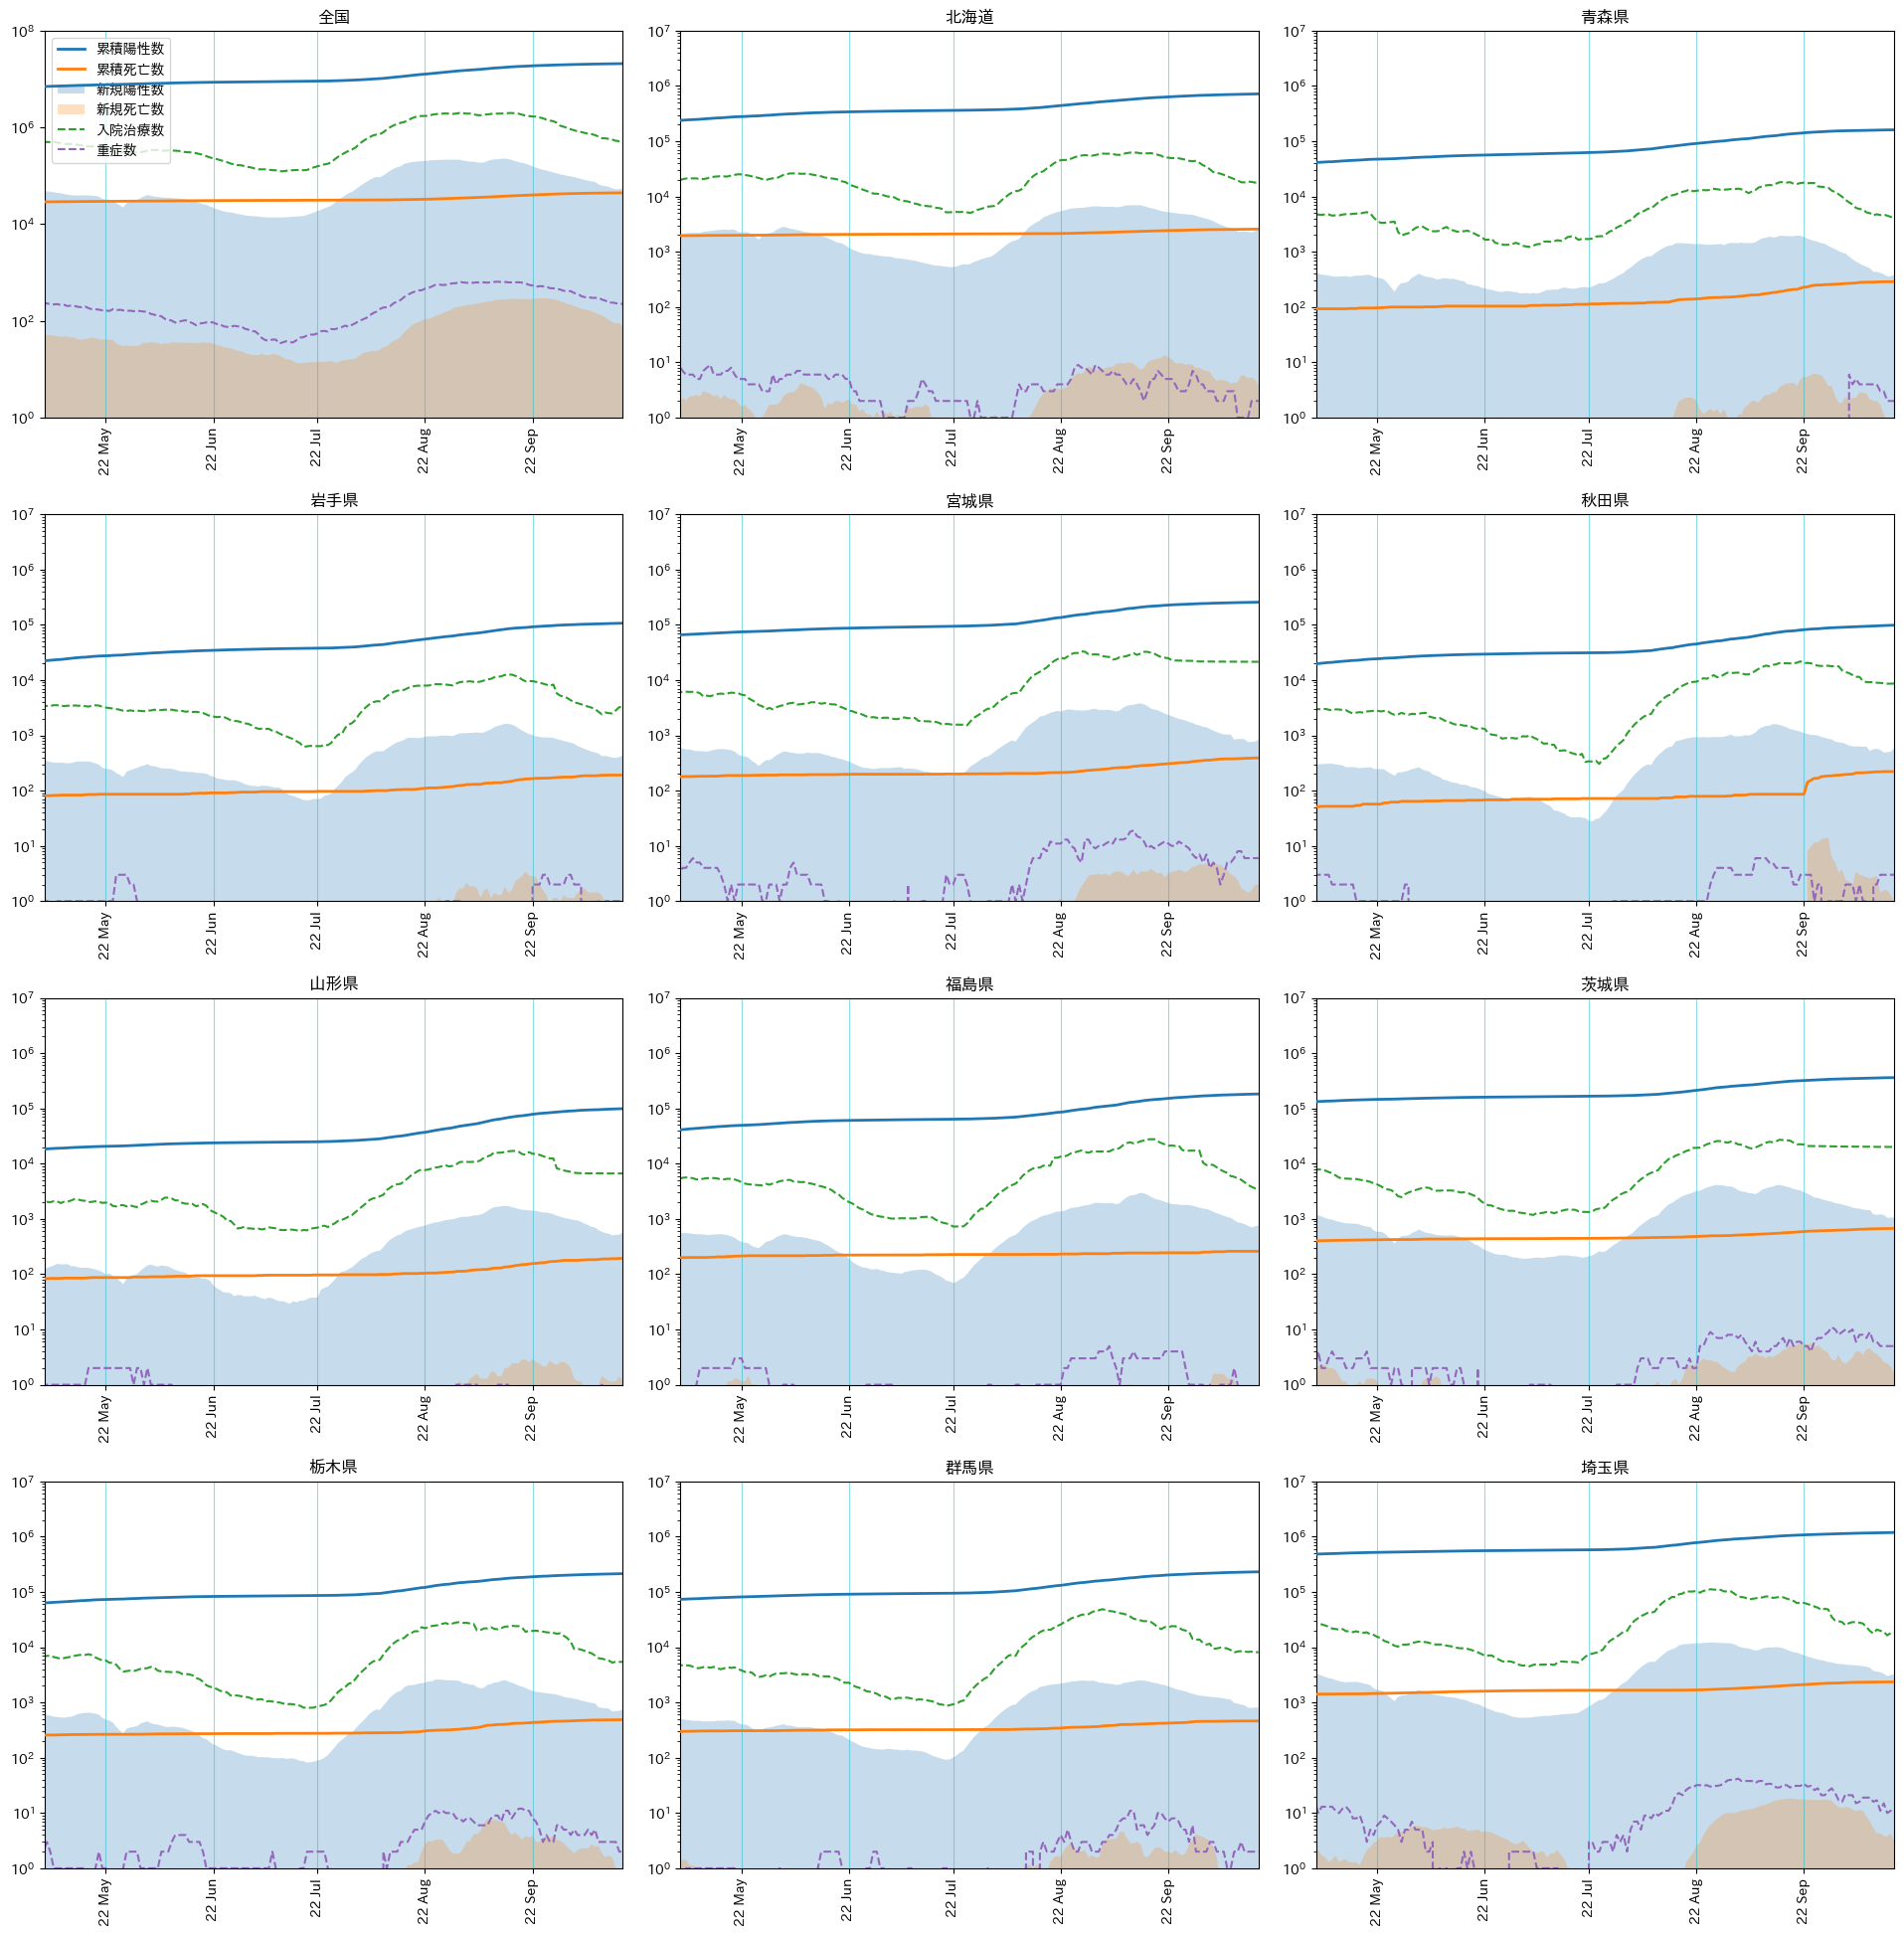

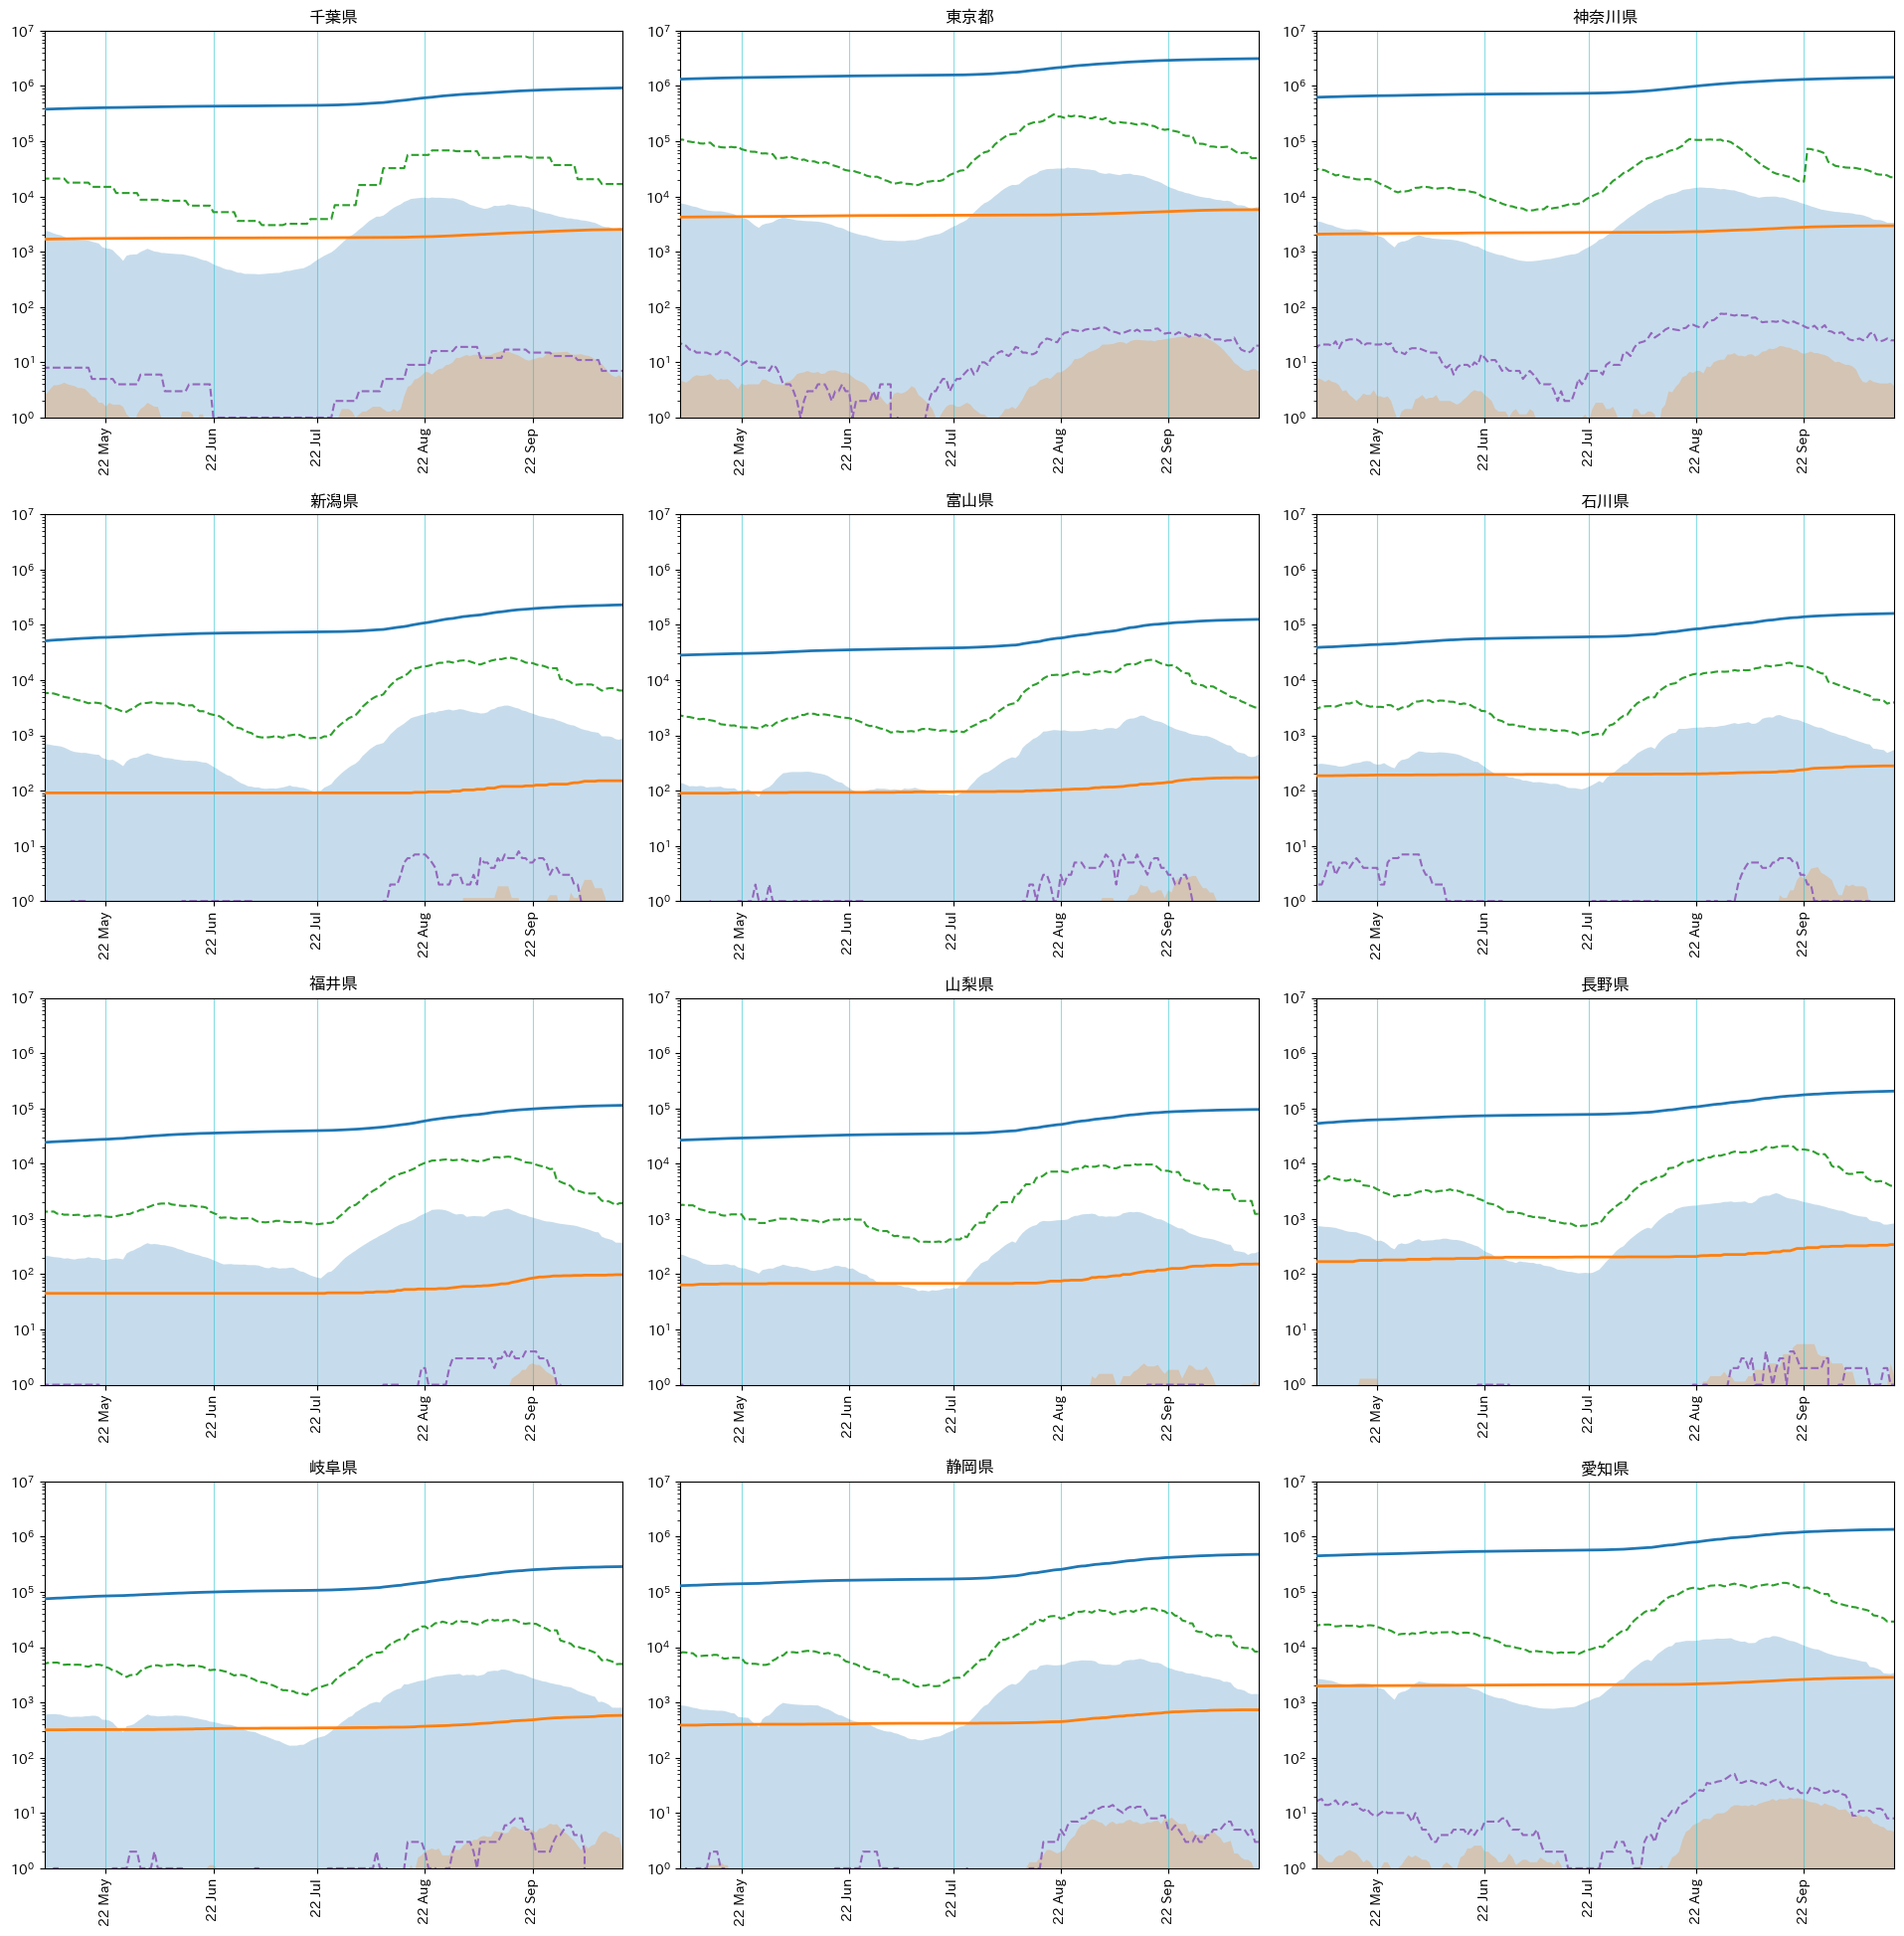

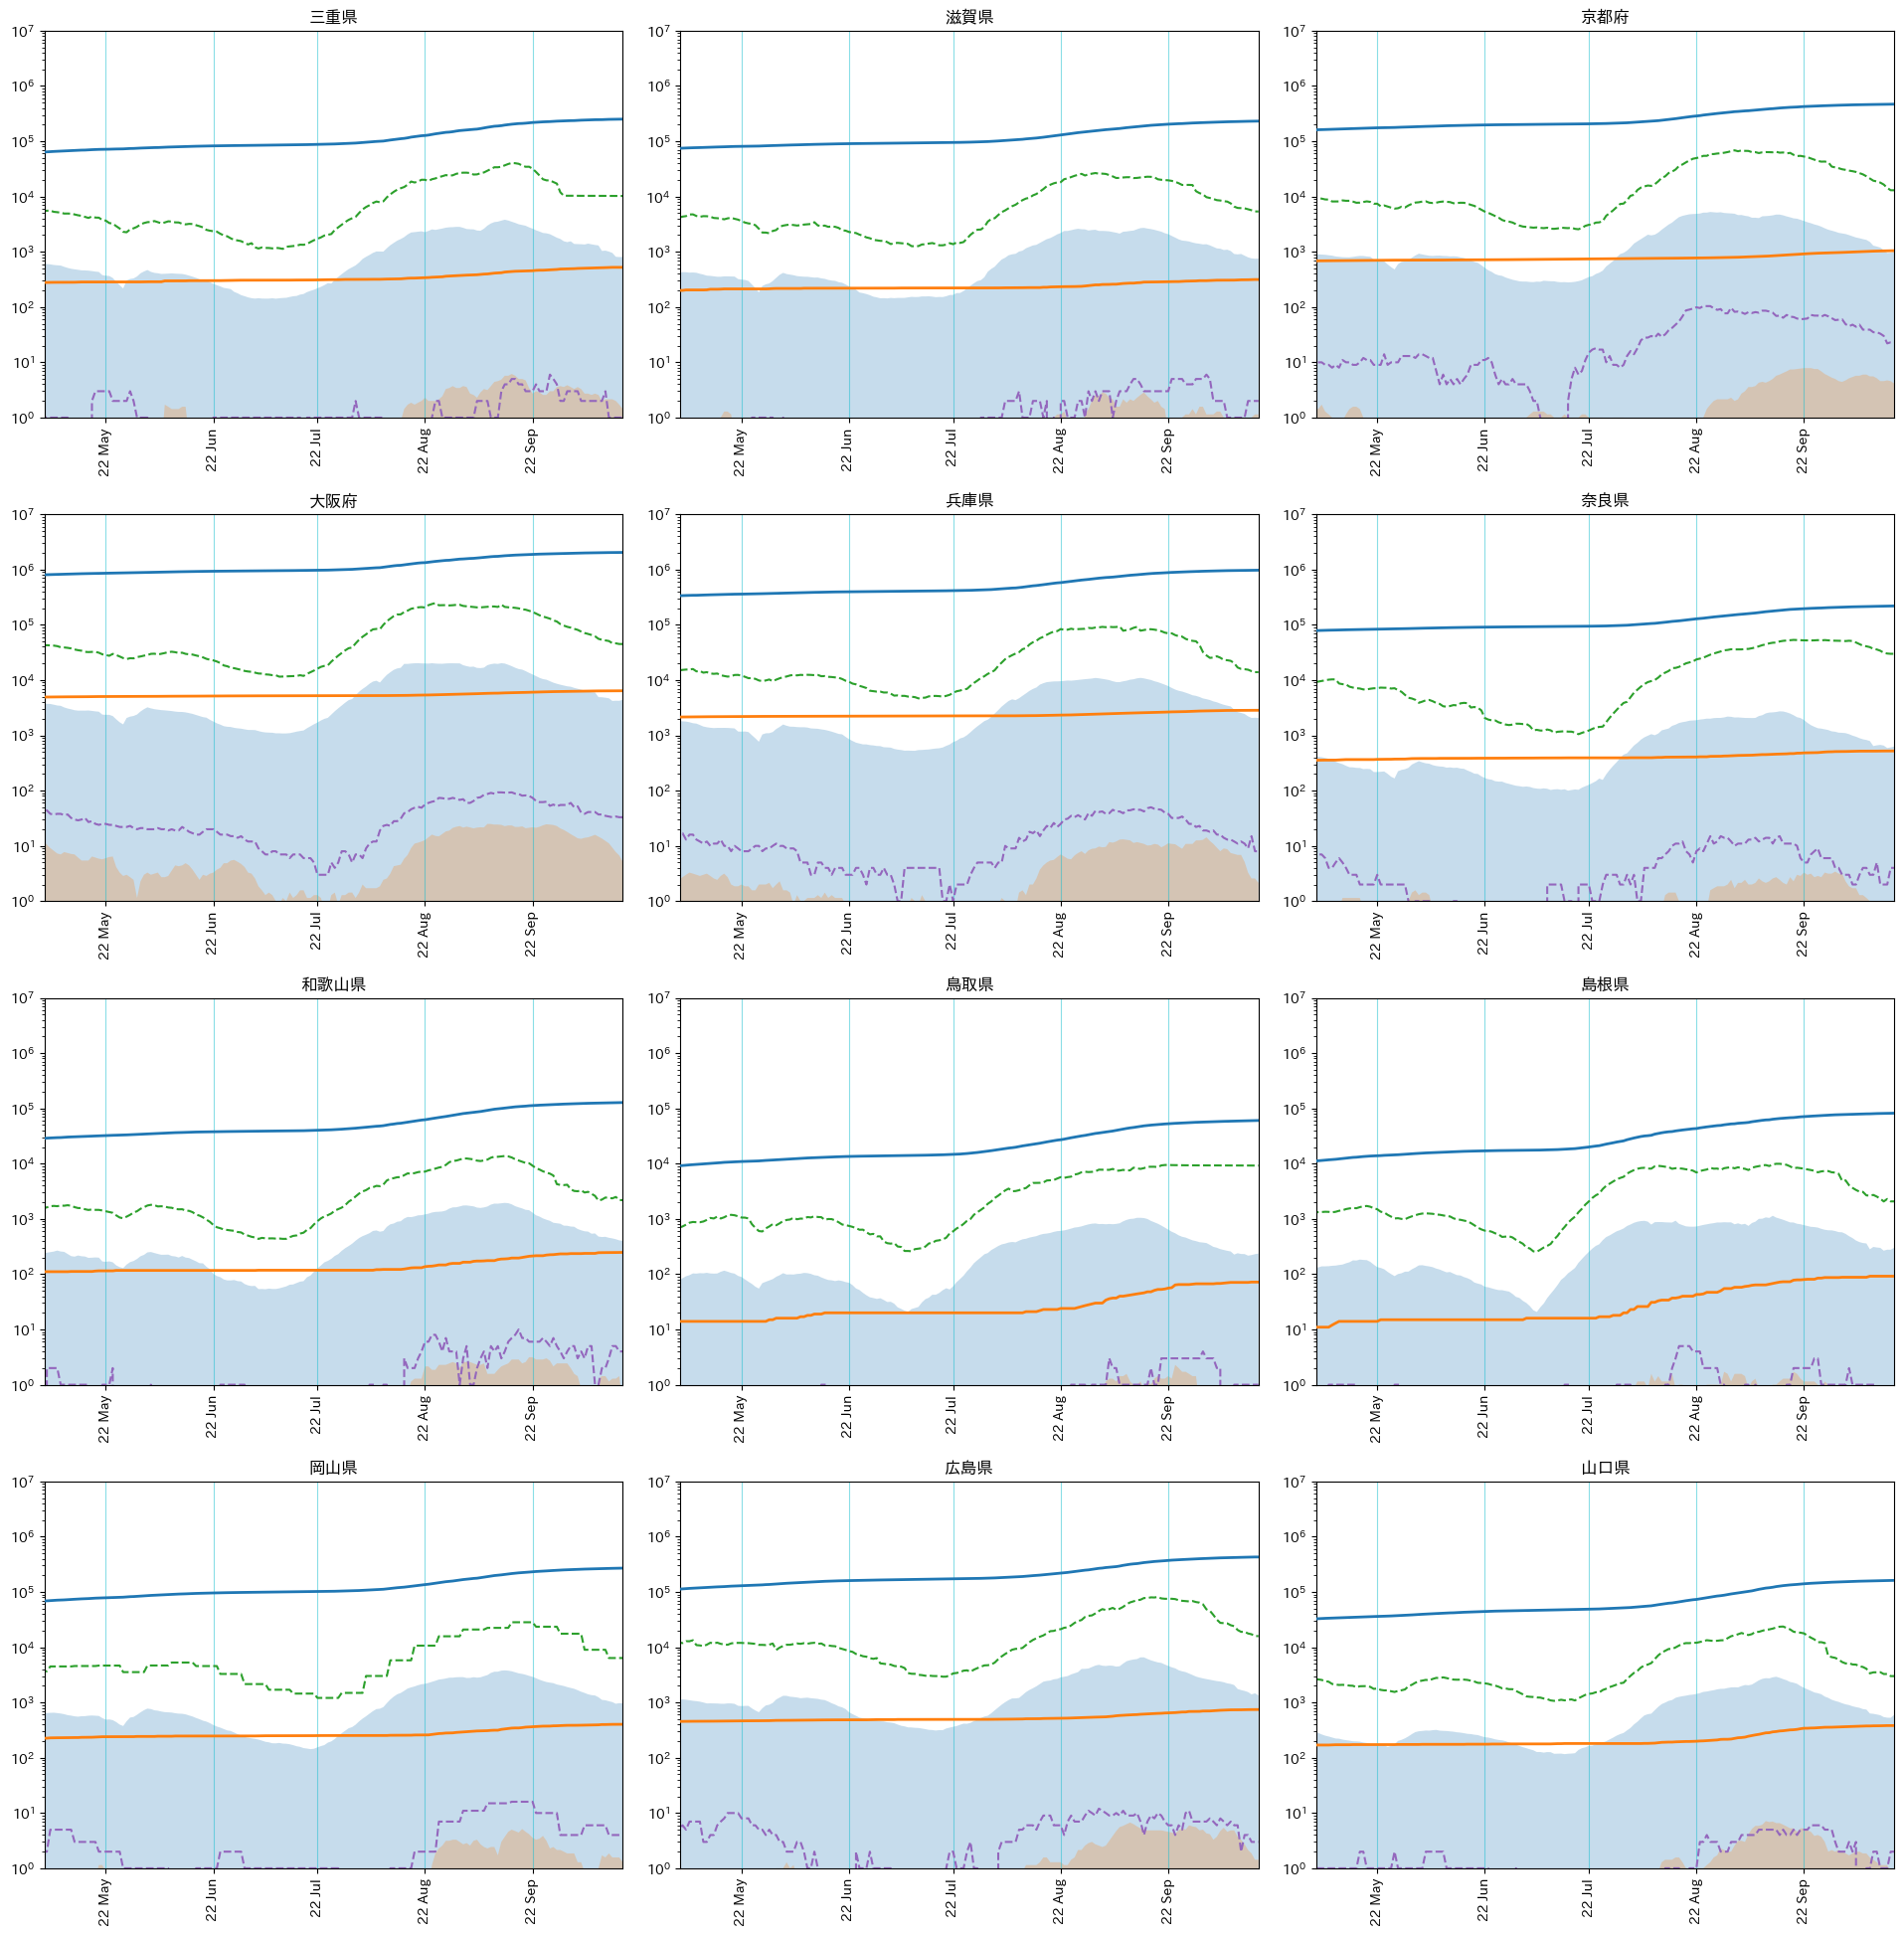

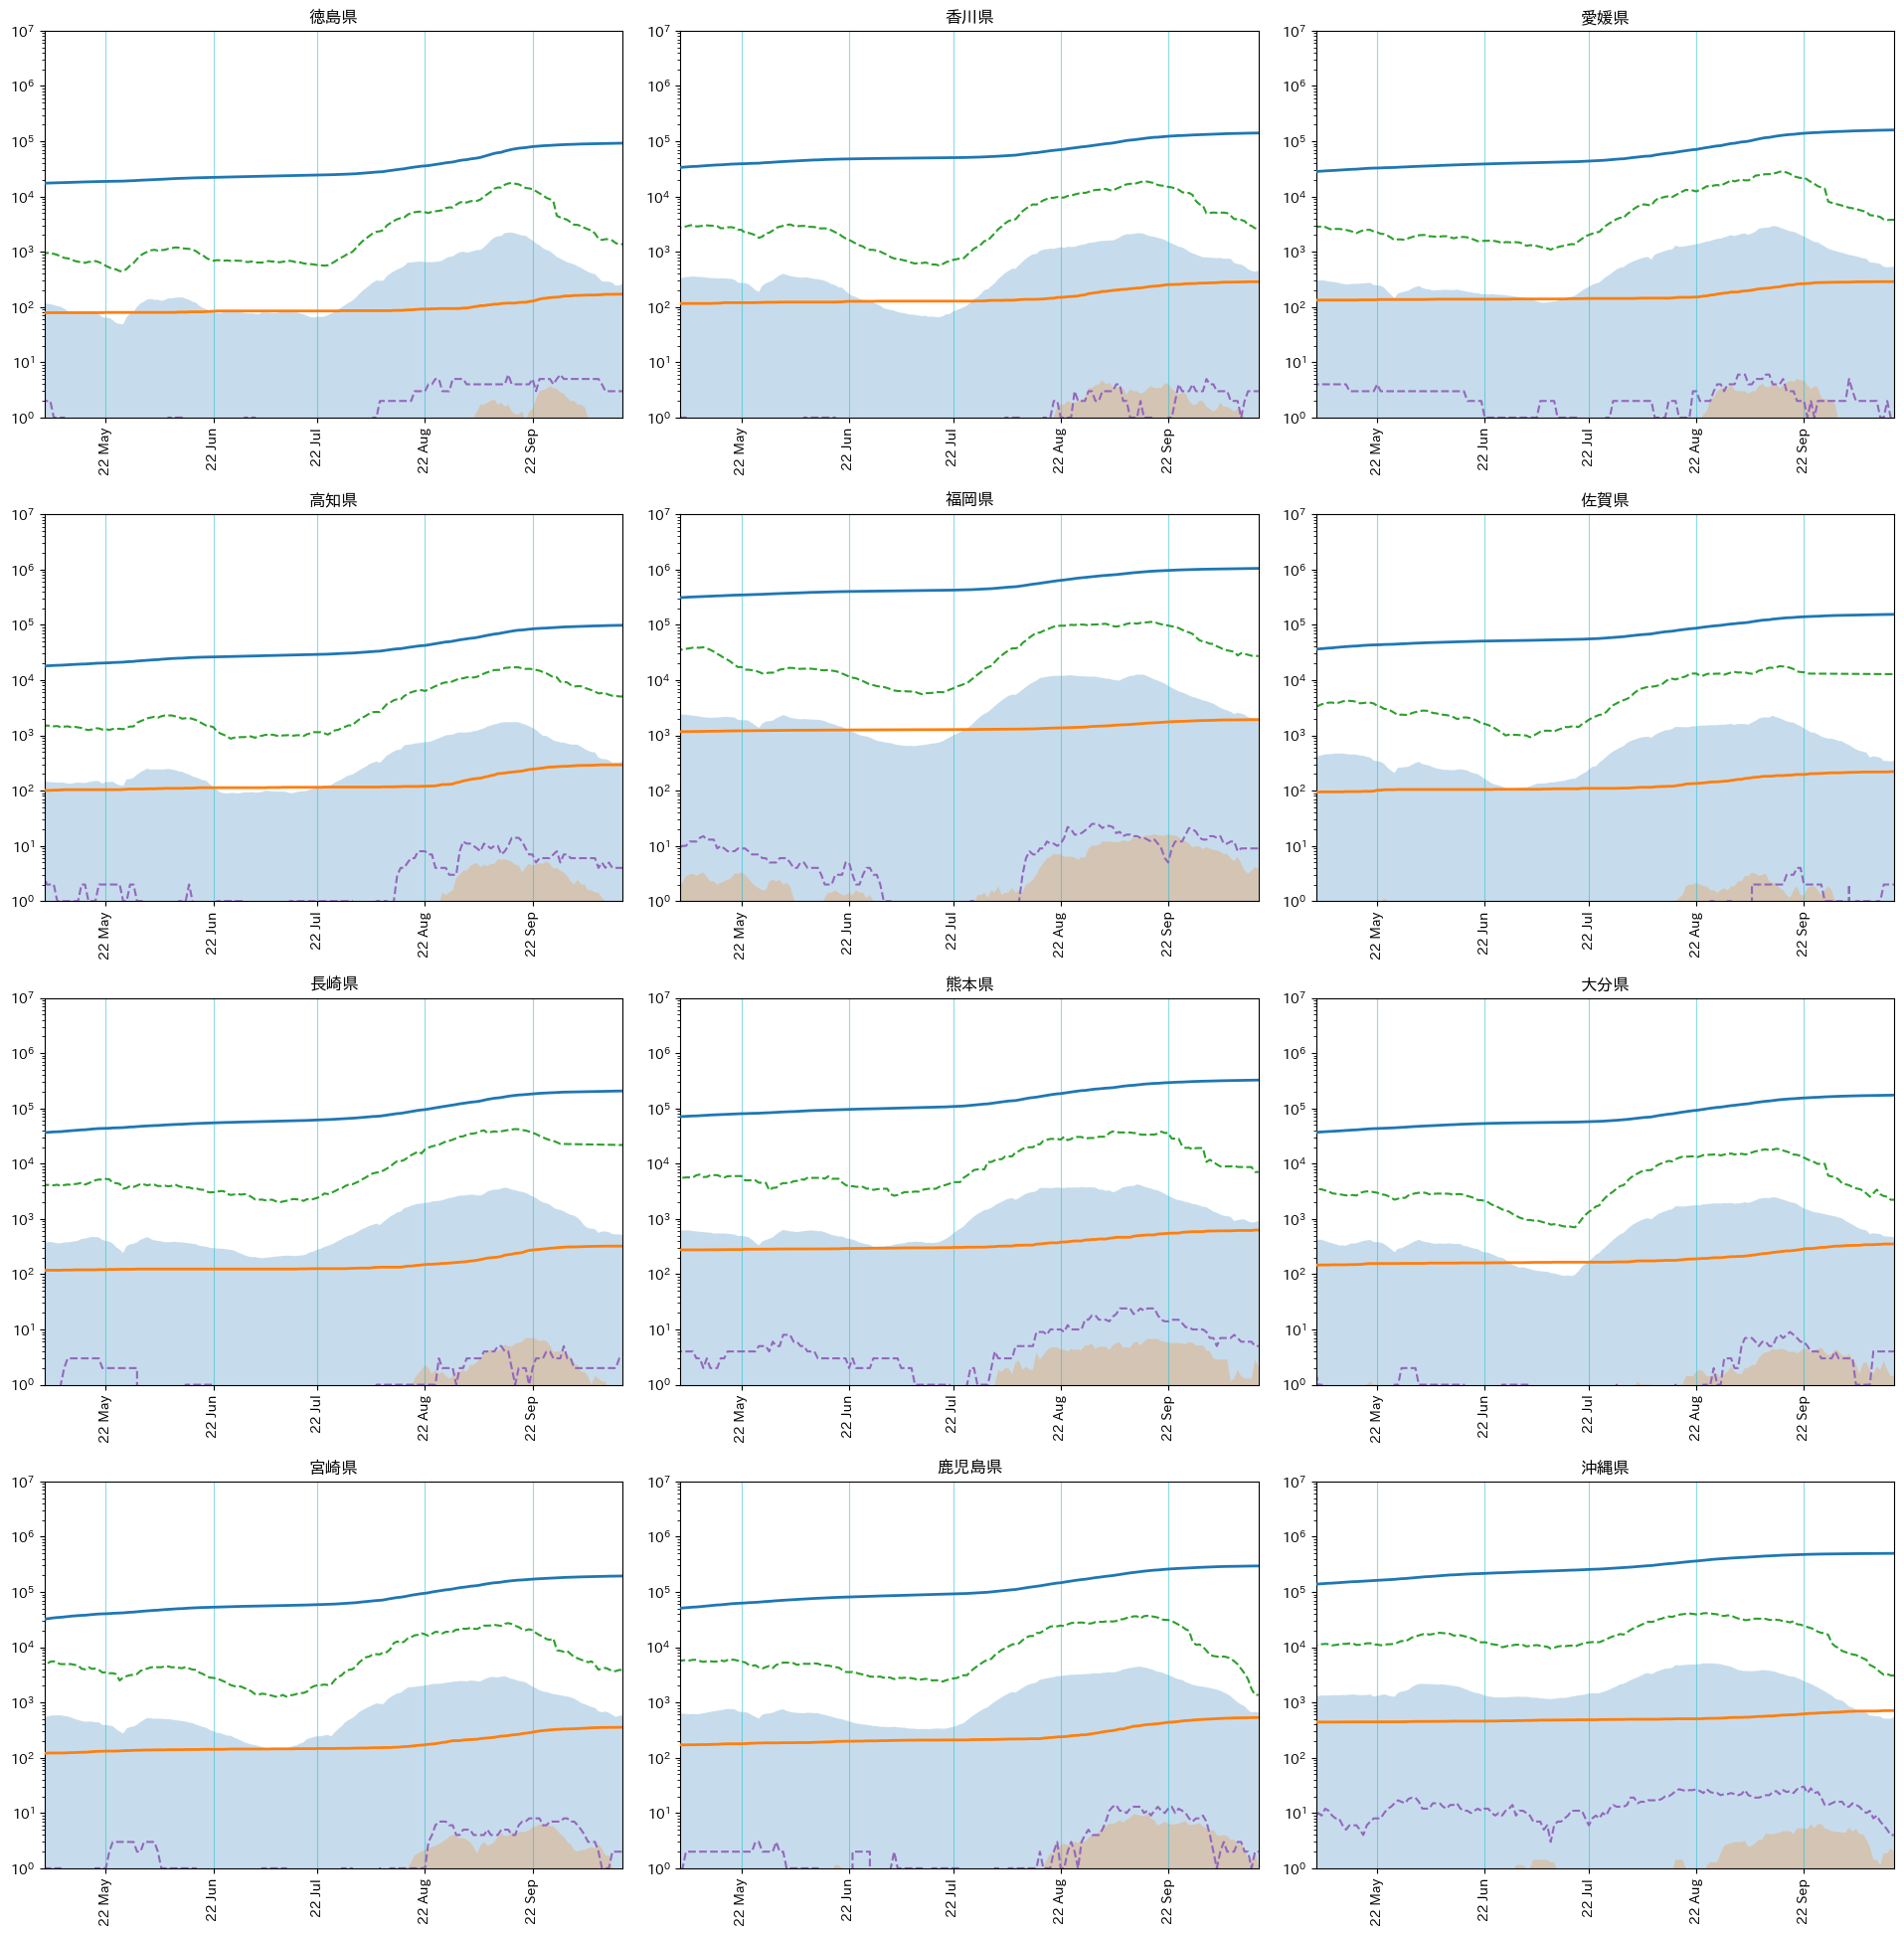

In [4]:
# 全国+47都道府県を4つに分けて描画し，グラフに保存
for sid in range(4):
    pref_set = EN_pref[sid*12:(sid+1)*12]
    fig, ax = plot_pref(pref_set, back_weeks=24)
    #fig.savefig('fig/CoVid19-Japan-cases_by_pref-{}.png'.format(sid), bbox_inches='tight')